In [1]:
from sklearn.datasets import fetch_mldata
mnist_dataset = fetch_mldata("MNIST original")

In [2]:
X_train = mnist_dataset.data.astype('float64')[:60001]
y_train = mnist_dataset.target.astype('int')[:60001]
X_test = mnist_dataset.data.astype('float64')[60001:]
y_test = mnist_dataset.target.astype('int')[60001:]

## 1
Исследовать, какой алгоритм поиска ближайших соседей будет быстрее работать в различных ситуациях. Для каждого объекта тестовой выборки найти 5 его ближайших соседей в обучающей для евклидовой метрики. Для выборки нужно выбрать подмножество признаков, по которому будет считаться расстояние, размера 10, 20, 100 (подмножество признаков выбирается один раз для всех объектов, случайно). Необходимо проверить все алгоритмы поиска ближайших соседей, указанные в спецификации к заданию.

## Замечание. 

Для оценки времени долго работающих функций можно пользоваться либо функциями из модуля time, либо magic-командой %time, которая запускает код лишь один раз.

In [3]:
from nearest_neighbors import KNNClassifier

brute_classifier = KNNClassifier(k=5, strategy='brute', weights=False)
ball_tree_classifier = KNNClassifier(k=5, strategy='ball_tree', weights=False)
kd_tree_classifier = KNNClassifier(k=5, strategy='kd_tree', weights=False)

In [4]:
import numpy as np

Выбираем подмножества признаков:

In [5]:
features_10 = np.random.permutation(np.arange(X_train.shape[1]))[:10]
features_20 = np.random.permutation(np.arange(X_train.shape[1]))[:20]
features_100 = np.random.permutation(np.arange(X_train.shape[1]))[:100]

In [6]:
X_train_10 = X_train[:, features_10]
X_train_20 = X_train[:, features_20]
X_train_100 = X_train[:, features_100]

X_test_10 = X_test[:, features_10]
X_test_20 = X_test[:, features_20]
X_test_100 = X_test[:, features_100]


## brute

10 признаков

In [7]:
brute_classifier.fit(X_train_10, y_train)

In [8]:
%time brute_classifier.find_kneighbors(X=X_test_10)

CPU times: user 12.7 s, sys: 13.2 s, total: 26 s
Wall time: 29.9 s


array([[34018, 33992, 34021, 13425, 13428],
       [34172, 54481, 45479, 58227,  1463],
       [34018, 33992, 34021, 13425, 13428],
       ..., 
       [ 1257,  4946, 47105, 34068, 34050],
       [56704,  9784, 35604, 53378, 34410],
       [56380, 53315, 43624, 37862,  7291]])

20 признаков

In [9]:
brute_classifier.fit(X_train_20, y_train)

In [10]:
%time brute_classifier.find_kneighbors(X=X_test_20)

CPU times: user 12.8 s, sys: 7.58 s, total: 20.4 s
Wall time: 22.2 s


array([[35322,  1482, 32167,  1669, 31449],
       [  710,  5891,  2213,  2260,  2862],
       [28559,  2781, 24950, 52886, 53275],
       ..., 
       [42469, 42906, 42652, 42674, 46827],
       [54059, 55108, 43790, 29317, 59515],
       [57491, 44373, 46129, 44722, 57850]])

100 признаков

In [11]:
brute_classifier.fit(X_train_100, y_train)

In [12]:
%time brute_classifier.find_kneighbors(X=X_test_100)

CPU times: user 14.1 s, sys: 7.14 s, total: 21.2 s
Wall time: 21.6 s


array([[ 4922,  3007,  1930,  1738,  1964],
       [  282,  3227,  5283,  3081,   724],
       [ 2801,   277,  4452,  1863,  2257],
       ..., 
       [56245, 55907, 56536, 56539, 58120],
       [55617, 55595, 58407, 56653, 59426],
       [56745, 54129, 56913, 56747, 55277]])

## ball_tree

10 признаков

In [13]:
ball_tree_classifier.fit(X_train_10, y_train)


In [14]:
%time ball_tree_classifier.find_kneighbors(X=X_test_10)

CPU times: user 2.85 s, sys: 39 ms, total: 2.88 s
Wall time: 2.93 s


array([[  738,  2776,  2777,   373,  1537],
       [ 1836,  1770,  1463,   282,   854],
       [  738,  2776,  2777,   373,  1537],
       ..., 
       [  633, 33690, 19205, 19208, 31328],
       [56704,  9784, 35604, 53378, 34410],
       [56380, 53315, 43624, 37862,  7291]])

20 признаков

In [15]:
ball_tree_classifier.fit(X_train_20, y_train)


In [16]:
%time ball_tree_classifier.find_kneighbors(X=X_test_20)

CPU times: user 19.1 s, sys: 120 ms, total: 19.2 s
Wall time: 19.3 s


array([[35322,  1482, 32167,  1669, 31449],
       [  710,  5891,  2213,  2260,  2862],
       [28559,  2781, 24950, 52886, 53275],
       ..., 
       [42469, 42906, 42652, 42674, 46827],
       [54059, 55108, 43790, 29317, 59515],
       [57491, 44373, 46129, 44722, 57850]])

100 признаков

In [17]:
ball_tree_classifier.fit(X_train_100, y_train)

In [18]:
%time ball_tree_classifier.find_kneighbors(X=X_test_100)

CPU times: user 2min 1s, sys: 1.08 s, total: 2min 2s
Wall time: 2min 4s


array([[ 4922,  3007,  1930,  1738,  1964],
       [  282,  3227,  5283,  3081,   724],
       [ 2801,   277,  4452,  1863,  2257],
       ..., 
       [56245, 55907, 56536, 56539, 58120],
       [55617, 55595, 58407, 56653, 59426],
       [56745, 54129, 56913, 56747, 55277]])

## kd_tree

10 признаков

In [19]:
kd_tree_classifier.fit(X_train_10, y_train)


In [20]:
%time kd_tree_classifier.find_kneighbors(X=X_test_10)

CPU times: user 1.36 s, sys: 11.9 ms, total: 1.38 s
Wall time: 1.39 s


array([[  738,  2776,  2777,   373,  1537],
       [ 1836,  1770,  1463,   282,   854],
       [  738,  2776,  2777,   373,  1537],
       ..., 
       [  633, 33690, 19205, 19208, 31328],
       [56704,  9784, 35604, 53378, 34410],
       [56380, 53315, 43624, 37862,  7291]])

20 признаков

In [21]:
kd_tree_classifier.fit(X_train_20, y_train)


In [22]:
%time kd_tree_classifier.find_kneighbors(X=X_test_20)

CPU times: user 7 s, sys: 79.9 ms, total: 7.08 s
Wall time: 7.2 s


array([[35322,  1482, 32167,  1669, 31449],
       [  710,  5891,  2213,  2260,  2862],
       [28559,  2781, 24950, 52886, 53275],
       ..., 
       [42469, 42906, 42652, 42674, 46827],
       [54059, 55108, 43790, 29317, 59515],
       [57491, 44373, 46129, 44722, 57850]])

100 признаков

In [23]:
kd_tree_classifier.fit(X_train_100, y_train)


In [24]:
%time kd_tree_classifier.find_kneighbors(X=X_test_100)

CPU times: user 1min 48s, sys: 821 ms, total: 1min 49s
Wall time: 1min 50s


array([[ 4922,  3007,  1930,  1738,  1964],
       [  282,  3227,  5283,  3081,   724],
       [ 2801,   277,  4452,  1863,  2257],
       ..., 
       [56245, 55907, 56536, 56539, 58120],
       [55617, 55595, 58407, 56653, 59426],
       [56745, 54129, 56913, 56747, 55277]])

## my_own
10 признаков

In [25]:
my_own_classifier = KNNClassifier(k=5, strategy='my_own', weights=False)

In [26]:
my_own_classifier.fit(X=X_train_10, y=y_train)

In [27]:
%time my_own_classifier.find_kneighbors(X=X_test_10)

CPU times: user 36.7 s, sys: 6.9 s, total: 43.6 s
Wall time: 30.5 s


array([[34018, 33992, 34021, 13425, 13428],
       [34172, 54481, 45479, 58227,  1463],
       [34018, 33992, 34021, 13425, 13428],
       ..., 
       [ 1257,  4946, 47105, 34068, 34050],
       [56704,  9784, 35604, 53378, 34410],
       [56380, 53315, 43624, 37862,  7291]])

20 признаков

In [28]:
my_own_classifier.fit(X=X_train_20, y=y_train)

In [29]:
%time my_own_classifier.find_kneighbors(X=X_test_20)

CPU times: user 37.5 s, sys: 5.63 s, total: 43.1 s
Wall time: 28.5 s


array([[35322,  1482, 32167,  1669, 31449],
       [  710,  5891,  2213,  2260,  2862],
       [28559,  2781, 24950, 52886, 53275],
       ..., 
       [42469, 42906, 42652, 42674, 46827],
       [54059, 55108, 43790, 29317, 59515],
       [57491, 44373, 46129, 44722, 57850]])

100 признаков

In [30]:
my_own_classifier.fit(X=X_train_100, y=y_train)

In [31]:
%time my_own_classifier.find_kneighbors(X=X_test_100)

CPU times: user 39.8 s, sys: 5.26 s, total: 45.1 s
Wall time: 29.6 s


array([[ 4922,  3007,  1930,  1738,  1964],
       [  282,  3227,  5283,  3081,   724],
       [ 2801,   277,  4452,  1863,  2257],
       ..., 
       [56245, 55907, 56536, 56539, 58120],
       [55617, 55595, 58407, 56653, 59426],
       [56745, 54129, 56913, 56747, 55277]])

## 2
Оценить по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) и время работы k ближайших соседей в зависимости от следующих факторов:

(a) k от 1 до 10 (только влияние на точность).

(b) Используется евклидова или косинусная метрика.

In [135]:
from cross_validation import knn_cross_val_score as knn_cvs

from cross_validation import kfold

cv = kfold(n=X_train.shape[0], n_folds=3)



Евклидова метрика

In [79]:
%time euclidean_cvs = knn_cvs(X=X_train, y=y_train, cv=cv, k_list=list(range(1, 11)), metric='euclidean', weights=False)

CPU times: user 3min 16s, sys: 3min 50s, total: 7min 6s
Wall time: 6min 33s


In [80]:
euclidean_cvs

{1: array([ 0.97095  ,  0.9697   ,  0.9700515]),
 2: array([ 0.96335   ,  0.964     ,  0.96095195]),
 3: array([ 0.97035   ,  0.97105   ,  0.96825159]),
 4: array([ 0.9687    ,  0.96895   ,  0.96705165]),
 5: array([ 0.96955   ,  0.96845   ,  0.96655167]),
 6: array([ 0.9674    ,  0.96895   ,  0.96520174]),
 7: array([ 0.96735   ,  0.96795   ,  0.96615169]),
 8: array([ 0.96665   ,  0.967     ,  0.96420179]),
 9: array([ 0.9656    ,  0.9656    ,  0.96475176]),
 10: array([ 0.96505   ,  0.96505   ,  0.96310184])}

Косинусная метрика

In [81]:
%time cosine_cvs = knn_cvs(X=X_train, y=y_train, cv=cv, k_list=list(range(1, 11)), metric='cosine', weights=False)

CPU times: user 4min 17s, sys: 4min 43s, total: 9min 1s
Wall time: 10min 25s


In [82]:
cosine_cvs

{1: array([ 0.9727    ,  0.9738    ,  0.97410129]),
 2: array([ 0.969     ,  0.97165   ,  0.96725164]),
 3: array([ 0.9737    ,  0.975     ,  0.97265137]),
 4: array([ 0.9737    ,  0.9744    ,  0.97125144]),
 5: array([ 0.9721   ,  0.9733   ,  0.9720514]),
 6: array([ 0.9725    ,  0.9727    ,  0.97115144]),
 7: array([ 0.97145   ,  0.97185   ,  0.97065147]),
 8: array([ 0.9711   ,  0.9716   ,  0.9699515]),
 9: array([ 0.97005   ,  0.9706    ,  0.96835158]),
 10: array([ 0.9694    ,  0.9705    ,  0.96845158])}

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
k_list = list(range(1, 11))

euclidean_accuracy_fold_0 = [euclidean_cvs[k][0] for k in k_list]
euclidean_accuracy_fold_1 = [euclidean_cvs[k][1] for k in k_list]
euclidean_accuracy_fold_2 = [euclidean_cvs[k][2] for k in k_list]

cosine_accuracy_fold_0 = [cosine_cvs[k][0] for k in k_list]
cosine_accuracy_fold_1 = [cosine_cvs[k][1] for k in k_list]
cosine_accuracy_fold_2 = [cosine_cvs[k][2] for k in k_list]

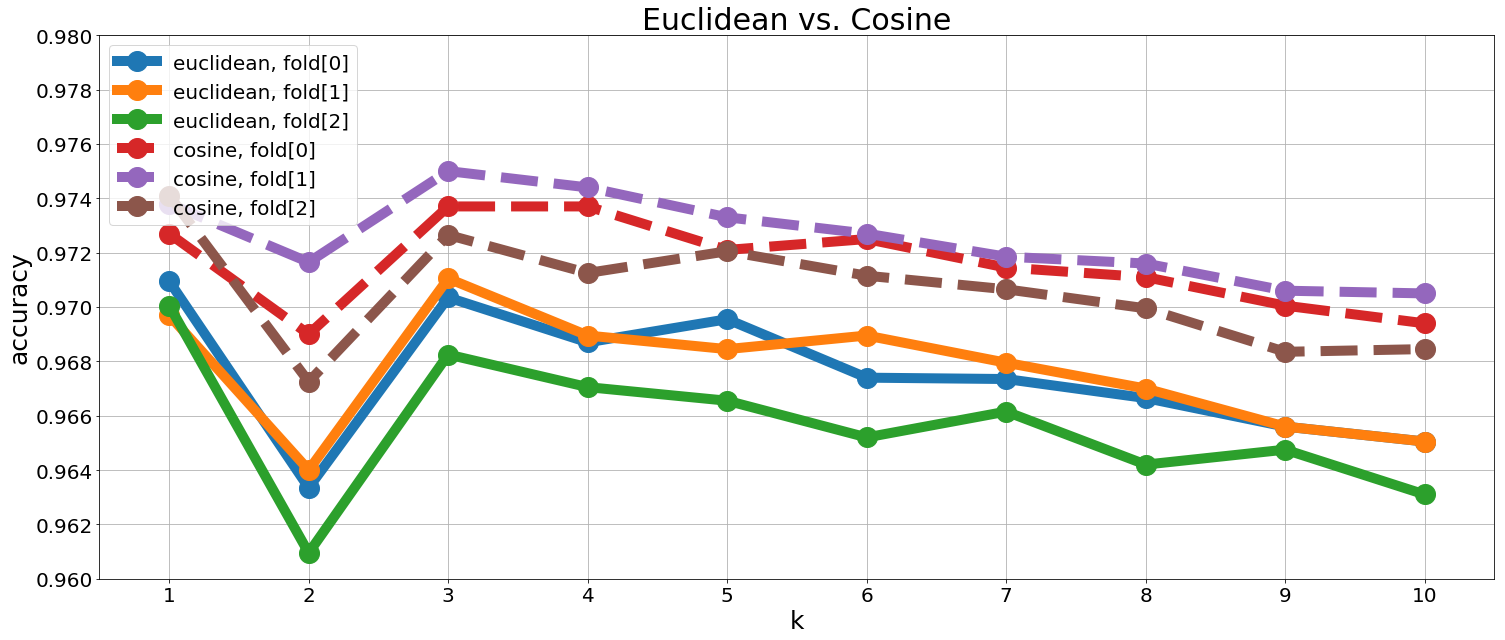

In [423]:
# создадим окружение
fig_2, ax = plt.subplots()

# зададим размеры рисунка
fig_2.set_figwidth(25)
fig_2.set_figheight(10)

ax.grid(True)
# заголовок рисунка
plt.title('Euclidean vs. Cosine', fontsize=30)

# добавим линии
plt.plot(k_list, euclidean_accuracy_fold_0, 'o-', ms=20, linewidth=10)
plt.plot(k_list, euclidean_accuracy_fold_1, 'o-', ms=20, linewidth=10)
plt.plot(k_list, euclidean_accuracy_fold_2, 'o-', ms=20, linewidth=10)
plt.plot(k_list, cosine_accuracy_fold_0, 'o--', ms=20, linewidth=10)
plt.plot(k_list, cosine_accuracy_fold_1, 'o--', ms=20, linewidth=10)
plt.plot(k_list, cosine_accuracy_fold_2, 'o--', ms=20, linewidth=10)

# установить разметку осей
plt.xticks(np.linspace(1, 10, 10), fontsize=20)
plt.yticks(np.linspace(0.960, 0.980, 11), fontsize=20)

# установить границы осей
plt.xlim(0.5, 10.5)
plt.ylim(0.960, 0.980)

# подпишем оси
plt.xlabel('k', fontsize=25)
plt.ylabel('accuracy', fontsize=25)


# легенда
plt.legend(['euclidean, fold[0]', 'euclidean, fold[1]', 'euclidean, fold[2]', \
                'cosine, fold[0]','cosine, fold[1]','cosine, fold[2]'], loc=2, fontsize=20)

# сохранить
plt.savefig('fig_2.pdf')

## 3
Сравнить взвешенный метод k ближайших соседей, где голос объекта равен 1/(distance + ε), где ε — 10−5, с методом без весов при тех же фолдах и параметрах.

In [88]:
%time euclidean_weighted_cvs = knn_cvs(X=X_train, y=y_train, cv=cv, k_list=k_list, weights=True, metric='euclidean')

CPU times: user 3min 15s, sys: 3min 9s, total: 6min 24s
Wall time: 5min 58s


In [89]:
euclidean_weighted_cvs

{1: array([ 0.97095  ,  0.9697   ,  0.9700515]),
 2: array([ 0.97095  ,  0.9697   ,  0.9700515]),
 3: array([ 0.97145  ,  0.97165  ,  0.9700015]),
 4: array([ 0.9733    ,  0.9725    ,  0.97150142]),
 5: array([ 0.97105   ,  0.97015   ,  0.96840158]),
 6: array([ 0.9712    ,  0.9707    ,  0.96940153]),
 7: array([ 0.9685    ,  0.96925   ,  0.96775161]),
 8: array([ 0.96945   ,  0.9698    ,  0.96775161]),
 9: array([ 0.9671    ,  0.96715   ,  0.96650167]),
 10: array([ 0.9674    ,  0.9671    ,  0.96585171])}

In [90]:
%time cosine_weighted_cvs = knn_cvs(X=X_train, y=y_train, cv=cv, k_list=k_list, weights=True, metric='cosine')

CPU times: user 3min 58s, sys: 4min 29s, total: 8min 28s
Wall time: 9min 47s


In [91]:
cosine_weighted_cvs

{1: array([ 0.9727    ,  0.9738    ,  0.97410129]),
 2: array([ 0.9727    ,  0.9738    ,  0.97410129]),
 3: array([ 0.97415   ,  0.97555   ,  0.97410129]),
 4: array([ 0.9751    ,  0.97675   ,  0.97465127]),
 5: array([ 0.97305   ,  0.9739    ,  0.97325134]),
 6: array([ 0.9742    ,  0.9747    ,  0.97430128]),
 7: array([ 0.9725    ,  0.97265   ,  0.97215139]),
 8: array([ 0.97285   ,  0.9735    ,  0.97225139]),
 9: array([ 0.971     ,  0.9719    ,  0.96980151]),
 10: array([ 0.972     ,  0.97195   ,  0.97050147])}

In [205]:
euclidean_weighted_accuracy_fold_0 = [euclidean_weighted_cvs[k][0] for k in k_list]
euclidean_weighted_accuracy_fold_1 = [euclidean_weighted_cvs[k][1] for k in k_list]
euclidean_weighted_accuracy_fold_2 = [euclidean_weighted_cvs[k][2] for k in k_list]

cosine_weighted_accuracy_fold_0 = [cosine_weighted_cvs[k][0] for k in k_list]
cosine_weighted_accuracy_fold_1 = [cosine_weighted_cvs[k][1] for k in k_list]
cosine_weighted_accuracy_fold_2 = [cosine_weighted_cvs[k][2] for k in k_list]

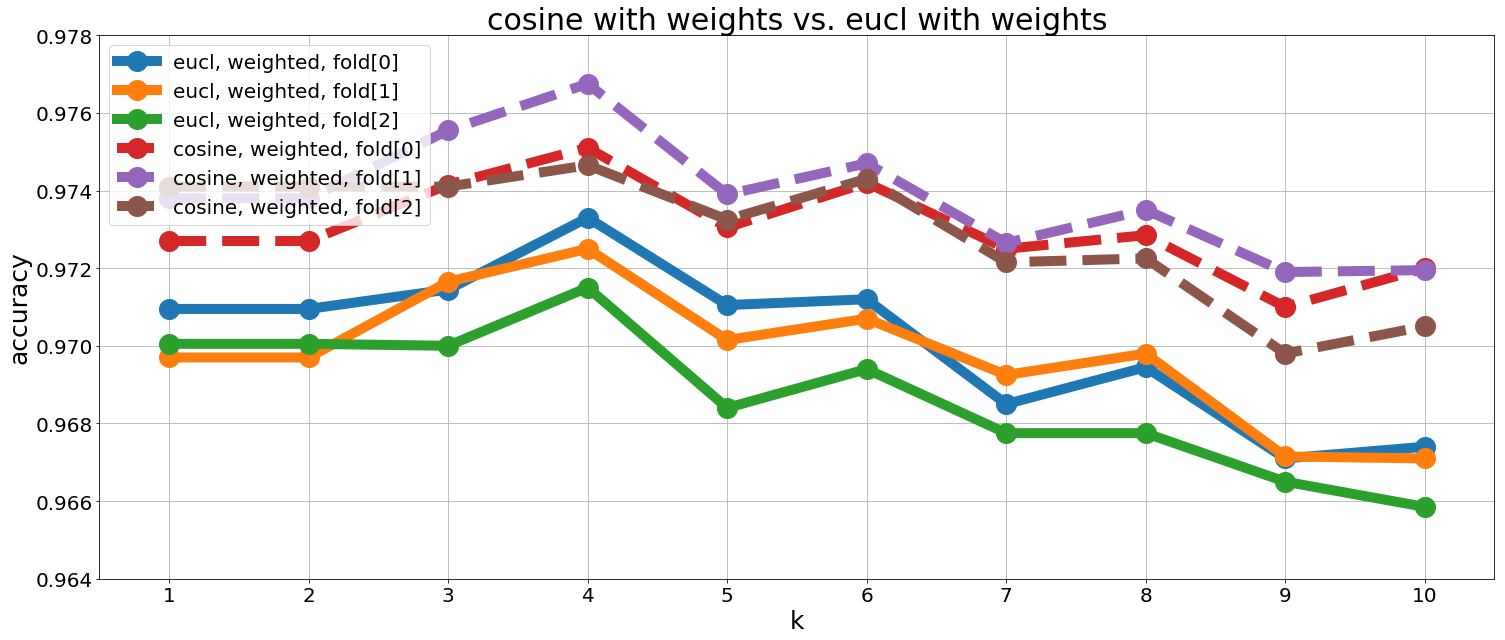

In [425]:
# создадим окружение
fig_3, ax = plt.subplots()

# зададим размеры рисунка
fig_3.set_figwidth(25)
fig_3.set_figheight(10)

ax.grid(True)
# заголовок рисунка
plt.title('cosine with weights vs. eucl with weights', fontsize=30)

# добавим линии
plt.plot(k_list, euclidean_weighted_accuracy_fold_0, 'o-', ms=20, linewidth=10)
plt.plot(k_list, euclidean_weighted_accuracy_fold_1, 'o-', ms=20, linewidth=10)
plt.plot(k_list, euclidean_weighted_accuracy_fold_2, 'o-', ms=20, linewidth=10)
plt.plot(k_list, cosine_weighted_accuracy_fold_0, 'o--', ms=20, linewidth=10)
plt.plot(k_list, cosine_weighted_accuracy_fold_1, 'o--', ms=20, linewidth=10)
plt.plot(k_list, cosine_weighted_accuracy_fold_2, 'o--', ms=20, linewidth=10)

# установить разметку осей
plt.xticks(np.linspace(1, 10, 10), fontsize=20)
plt.yticks(np.linspace(0.964, 0.978, 8), fontsize=20)

# установить границы осей
plt.xlim(0.5, 10.5)
plt.ylim(0.964, 0.978)

# подпишем оси
plt.xlabel('k', fontsize=25)
plt.ylabel('accuracy', fontsize=25)


# легенда
plt.legend(['eucl, weighted, fold[0]', 'eucl, weighted, fold[1]', 'eucl, weighted, fold[2]', \
                'cosine, weighted, fold[0]','cosine, weighted, fold[1]','cosine, weighted, fold[2]'], \
                   loc=2, fontsize=20)

# сохранить
plt.savefig('fig_3_1.pdf')

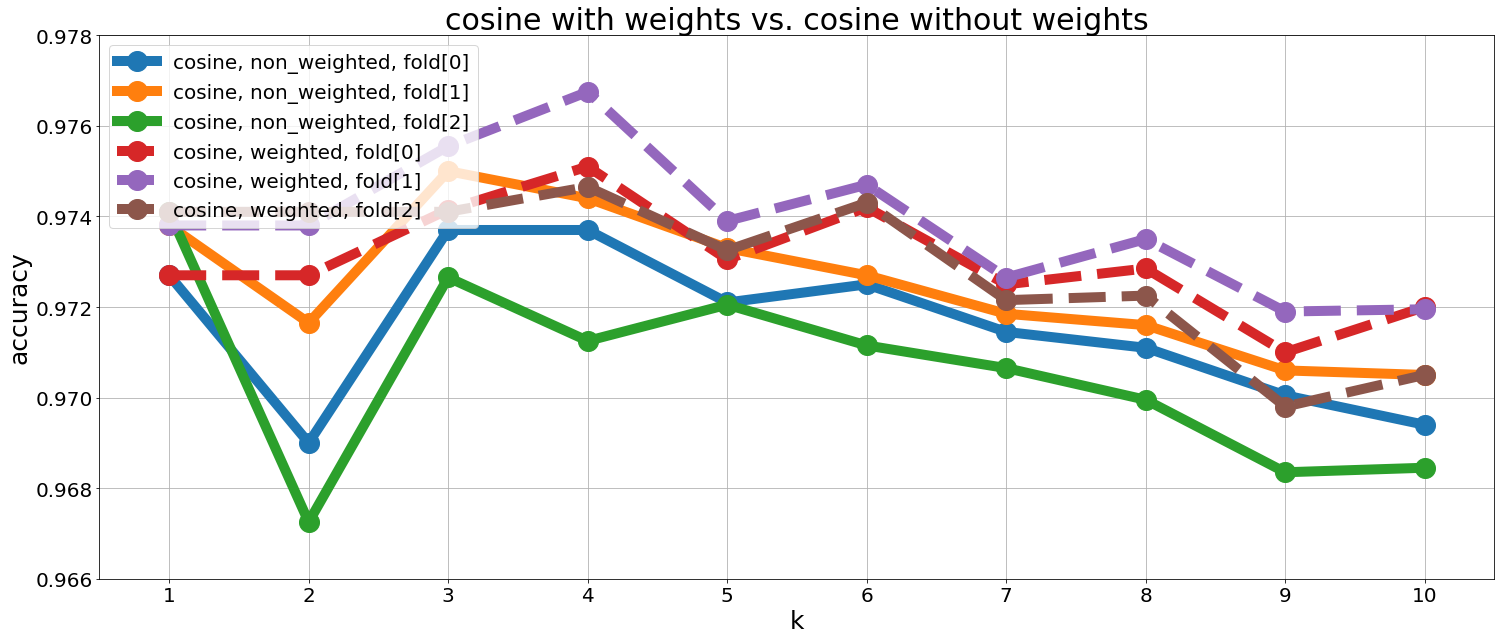

In [427]:
# создадим окружение
fig_3_2, ax = plt.subplots()

# зададим размеры рисунка
fig_3_2.set_figwidth(25)
fig_3_2.set_figheight(10)

ax.grid(True)
# заголовок рисунка
plt.title('cosine with weights vs. cosine without weights', fontsize=30)

# добавим линии
plt.plot(k_list, cosine_accuracy_fold_0, 'o-', ms=20, linewidth=10)
plt.plot(k_list, cosine_accuracy_fold_1, 'o-', ms=20, linewidth=10)
plt.plot(k_list, cosine_accuracy_fold_2, 'o-', ms=20, linewidth=10)
plt.plot(k_list, cosine_weighted_accuracy_fold_0, 'o--', ms=20, linewidth=10)
plt.plot(k_list, cosine_weighted_accuracy_fold_1, 'o--', ms=20, linewidth=10)
plt.plot(k_list, cosine_weighted_accuracy_fold_2, 'o--', ms=20, linewidth=10)

# установить разметку осей
plt.xticks(np.linspace(1, 10, 10), fontsize=20)
plt.yticks(np.linspace(0.966, 0.978, 7), fontsize=20)

# установить границы осей
plt.xlim(0.5, 10.5)
plt.ylim(0.966, 0.978)

# подпишем оси
plt.xlabel('k', fontsize=25)
plt.ylabel('accuracy', fontsize=25)


# легенда
plt.legend(['cosine, non_weighted, fold[0]', 'cosine, non_weighted, fold[1]', 'cosine, non_weighted, fold[2]', \
                'cosine, weighted, fold[0]','cosine, weighted, fold[1]','cosine, weighted, fold[2]'], \
                   loc=2, fontsize=20)

# сохранить
plt.savefig('fig_3_2.pdf')

## 4
Применить лучший алгоритм к исходной обучающей и тестовой выборке. Подсчитать точность. Сравнить с точностью по кросс-валидации. Сравнить с указанной в интернете точностью лучших алгоритмов на данной выборке. Построить и проанализировать матрицу ошибок (confusion matrix). Визуализировать несколько объектов из тестовой выборки, на которых были допущены ошибки. Проанализировать и указать их общие черты.

Замечание. Можно воспользоваться функцией sklearn.metrics.confusion_matrix. Для визуализации можно воспользоваться pyplot.subplot, и pyplot.imshow с параметром cmap="Greys". Также можно убрать оси координат при помощи команды pyplot.axis("off").

In [104]:
best_classifier = KNNClassifier(k=4, metric='cosine', weights=True)

In [105]:
best_classifier.fit(X=X_train, y=y_train)

In [106]:
%time y_pred_4 = best_classifier.predict(X=X_test)

CPU times: user 36.9 s, sys: 12.7 s, total: 49.6 s
Wall time: 40.5 s


In [107]:
y_pred_4

array([0, 0, 0, ..., 9, 9, 9])

In [108]:
pred_4_accuracy = np.ones(y_pred_4.shape[0], \
                            dtype=int)[y_pred_4 == y_test].sum() / y_pred_4.shape[0]

In [109]:
pred_4_accuracy

0.97519751975197522

In [111]:
best_cvs = cosine_weighted_cvs
best_cvs

{1: array([ 0.9727    ,  0.9738    ,  0.97410129]),
 2: array([ 0.9727    ,  0.9738    ,  0.97410129]),
 3: array([ 0.97415   ,  0.97555   ,  0.97410129]),
 4: array([ 0.9751    ,  0.97675   ,  0.97465127]),
 5: array([ 0.97305   ,  0.9739    ,  0.97325134]),
 6: array([ 0.9742    ,  0.9747    ,  0.97430128]),
 7: array([ 0.9725    ,  0.97265   ,  0.97215139]),
 8: array([ 0.97285   ,  0.9735    ,  0.97225139]),
 9: array([ 0.971     ,  0.9719    ,  0.96980151]),
 10: array([ 0.972     ,  0.97195   ,  0.97050147])}

In [112]:
best_internet_accuracy = 1 - 0.21 * 0.01
best_internet_accuracy

0.9979

In [35]:
from sklearn.metrics import confusion_matrix

In [114]:
conf_matr = confusion_matrix(y_true=y_test, y_pred=y_pred_4)

In [115]:
conf_matr

array([[ 976,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1129,    3,    1,    0,    0,    2,    0,    0,    0],
       [   8,    0, 1009,    1,    1,    0,    0,    8,    5,    0],
       [   0,    1,    3,  976,    1,   12,    0,    4,    9,    4],
       [   2,    1,    0,    0,  946,    0,    6,    2,    0,   25],
       [   4,    0,    0,    9,    1,  863,    7,    1,    4,    3],
       [   3,    3,    0,    0,    1,    3,  948,    0,    0,    0],
       [   2,   10,    4,    0,    1,    0,    0,  998,    0,   13],
       [   7,    1,    2,    9,    3,    3,    5,    4,  936,    4],
       [   7,    7,    2,    5,    7,    3,    1,    4,    3,  970]])

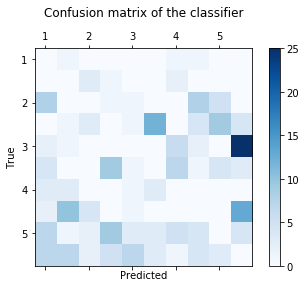

In [125]:
for i in range(10):
    conf_matr[i, i] = 0
fig_conf_matr, ax = plt.subplots()
cax = ax.matshow(conf_matr, cmap='Blues')
plt.title('Confusion matrix of the classifier\n')
fig_conf_matr.colorbar(cax)
ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticklabels(list(range(0, 10, 1)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('fig_4_conf_matrix.pdf')

In [40]:
import itertools
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[ 0  1  0  0  0  0  1  1  0  0]
 [ 0  0  3  1  0  0  2  0  0  0]
 [ 8  0  0  1  1  0  0  8  5  0]
 [ 0  1  3  0  1 12  0  4  9  4]
 [ 2  1  0  0  0  0  6  2  0 25]
 [ 4  0  0  9  1  0  7  1  4  3]
 [ 3  3  0  0  1  3  0  0  0  0]
 [ 2 10  4  0  1  0  0  0  0 13]
 [ 7  1  2  9  3  3  5  4  0  4]
 [ 7  7  2  5  7  3  1  4  3  0]]
Normalized confusion matrix
[[ 0.    0.33  0.    0.    0.    0.    0.33  0.33  0.    0.  ]
 [ 0.    0.    0.5   0.17  0.    0.    0.33  0.    0.    0.  ]
 [ 0.35  0.    0.    0.04  0.04  0.    0.    0.35  0.22  0.  ]
 [ 0.    0.03  0.09  0.    0.03  0.35  0.    0.12  0.26  0.12]
 [ 0.06  0.03  0.    0.    0.    0.    0.17  0.06  0.    0.69]
 [ 0.14  0.    0.    0.31  0.03  0.    0.24  0.03  0.14  0.1 ]
 [ 0.3   0.3   0.    0.    0.1   0.3   0.    0.    0.    0.  ]
 [ 0.07  0.33  0.13  0.    0.03  0.    0.    0.    0.    0.43]
 [ 0.18  0.03  0.05  0.24  0.08  0.08  0.13  0.11  0.    0.11]
 [ 0.18  0.18  0.05  0.13  0.18  0

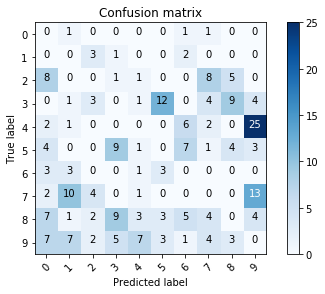

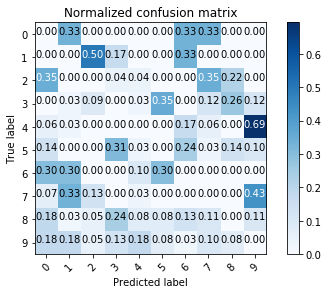

In [435]:
import itertools
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_4)
for i in range(10):
    cnf_matrix[i, i] = 0
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.savefig('fig_4_conf_matrix.pdf')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [126]:
error_indices = np.arange(y_test.shape[0])[y_test != y_pred_4]

In [127]:
error_indices

array([ 628,  806,  941, 1096, 1230, 1238, 1327, 1465, 1588, 2149, 2163,
       2219, 2221, 2310, 2331, 2333, 2339, 2363, 2386, 2509, 2511, 2549,
       2563, 2742, 2782, 3112, 3122, 3123, 3126, 3129, 3133, 3137, 3189,
       3209, 3246, 3248, 3256, 3265, 3280, 3319, 3367, 3368, 3393, 3404,
       3451, 3454, 3455, 3506, 3517, 3578, 3620, 3625, 3644, 3653, 3716,
       3739, 3740, 3742, 3743, 3746, 3748, 3931, 3977, 3978, 4146, 4151,
       4172, 4187, 4207, 4230, 4236, 4254, 4279, 4291, 4294, 4315, 4329,
       4353, 4360, 4387, 4425, 4449, 4467, 4515, 4523, 4559, 4569, 4576,
       4585, 4642, 4647, 4741, 4743, 4748, 4950, 4952, 4998, 4999, 5065,
       5104, 5112, 5117, 5221, 5234, 5255, 5263, 5292, 5315, 5341, 5342,
       5349, 5399, 5431, 5447, 5461, 5477, 5496, 5498, 5542, 5546, 5661,
       5675, 5677, 5683, 5685, 5842, 5865, 6008, 6009, 6013, 6027, 6065,
       6117, 6220, 6222, 6246, 6266, 6272, 6359, 6393, 6468, 7026, 7040,
       7114, 7117, 7134, 7138, 7142, 7163, 7262, 73

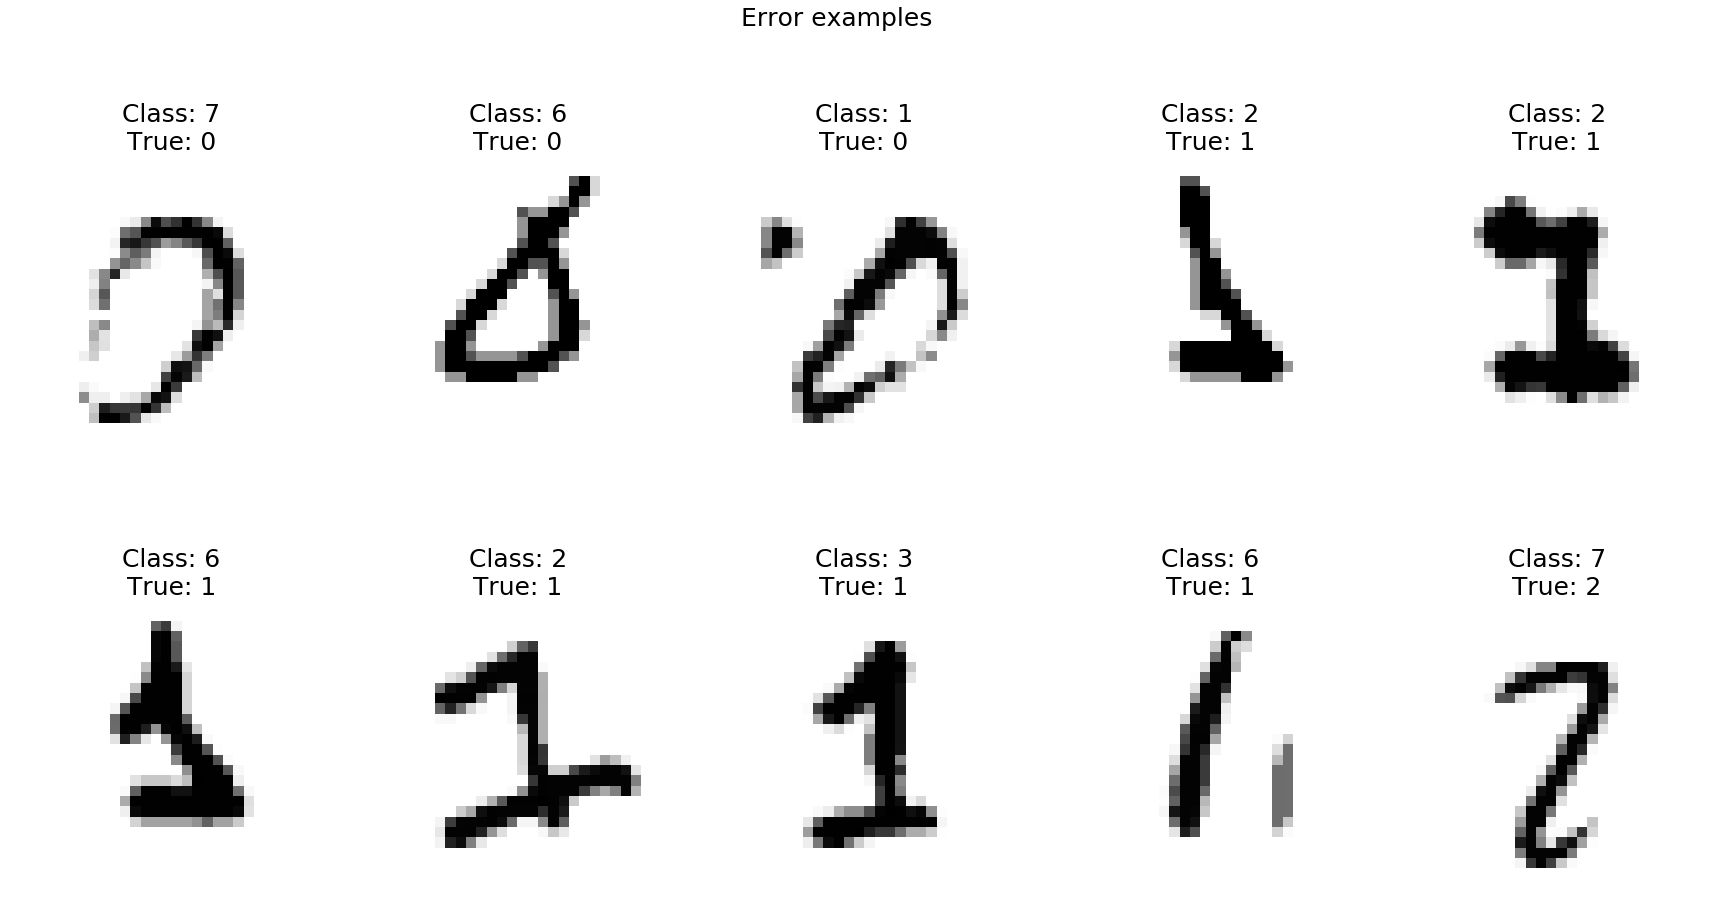

In [128]:
# создадим окружение
fig_4, ax = plt.subplots()
fig_4.set_figwidth(30)
fig_4.set_figheight(15)
for i in range(10):
    curr = plt.subplot(2, 5, i + 1)
    curr.imshow(X_test[error_indices[i]].reshape(28, 28),
                   cmap='Greys')
    curr.set_title('Class: %i\n' % y_pred_4[error_indices[i]] + 'True: %i' % y_test[error_indices[i]], fontsize=25)
    curr.axis('off')
plt.suptitle('Error examples',fontsize=25)

plt.savefig('fig_4.pdf')

In [129]:
eight_indices = np.arange(y_test.shape[0])[y_test == 8]
wrong_eight_indices = np.arange(y_test.shape[0])[y_test == 8][y_pred_4[y_test == 8] != 8]

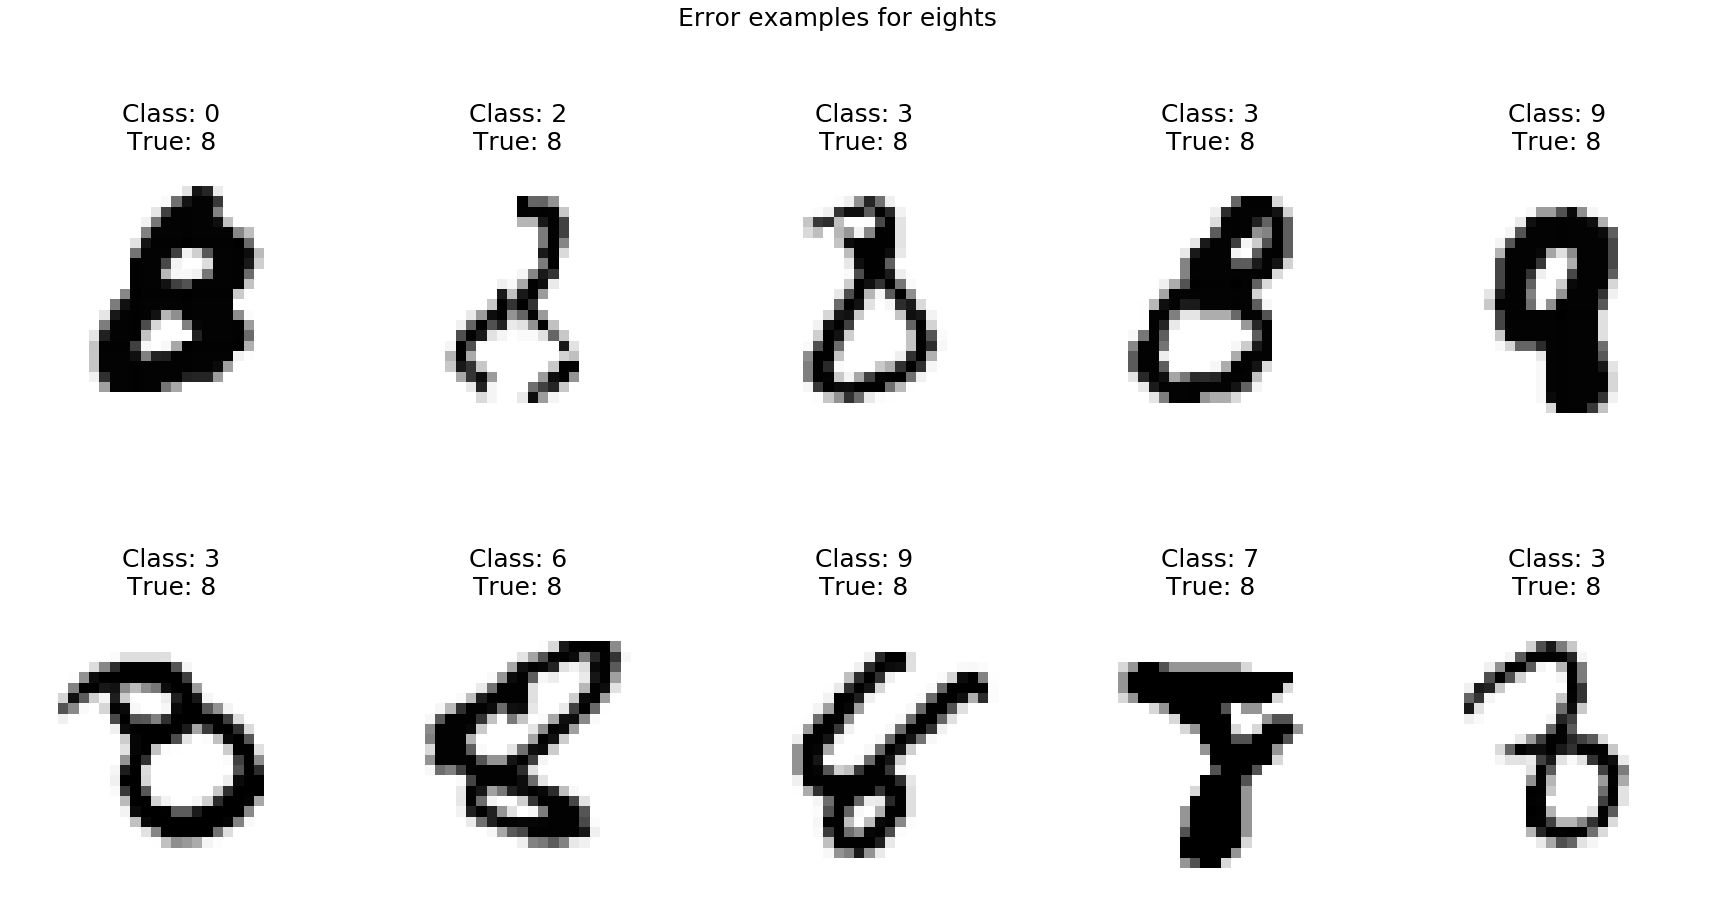

In [130]:
# создадим окружение
fig_4_eights, ax = plt.subplots()
fig_4_eights.set_figwidth(30)
fig_4_eights.set_figheight(15)
for i in range(10):
    curr = plt.subplot(2, 5, i + 1)
    curr.imshow(X_test[wrong_eight_indices[i]].reshape(28, 28),
                   cmap='Greys')
    curr.set_title('Class: %i\n' % y_pred_4[wrong_eight_indices[i]] + 'True: %i' % y_test[wrong_eight_indices[i]], fontsize=25)
    curr.axis('off')
plt.suptitle('Error examples for eights',fontsize=25)

plt.savefig('fig_4_eights.pdf')

In [131]:
fours_indices = np.arange(y_test.shape[0])[y_test == 4]
wrong_four_indices = np.arange(y_test.shape[0])[y_test == 4][y_pred_4[y_test == 4] != 4]

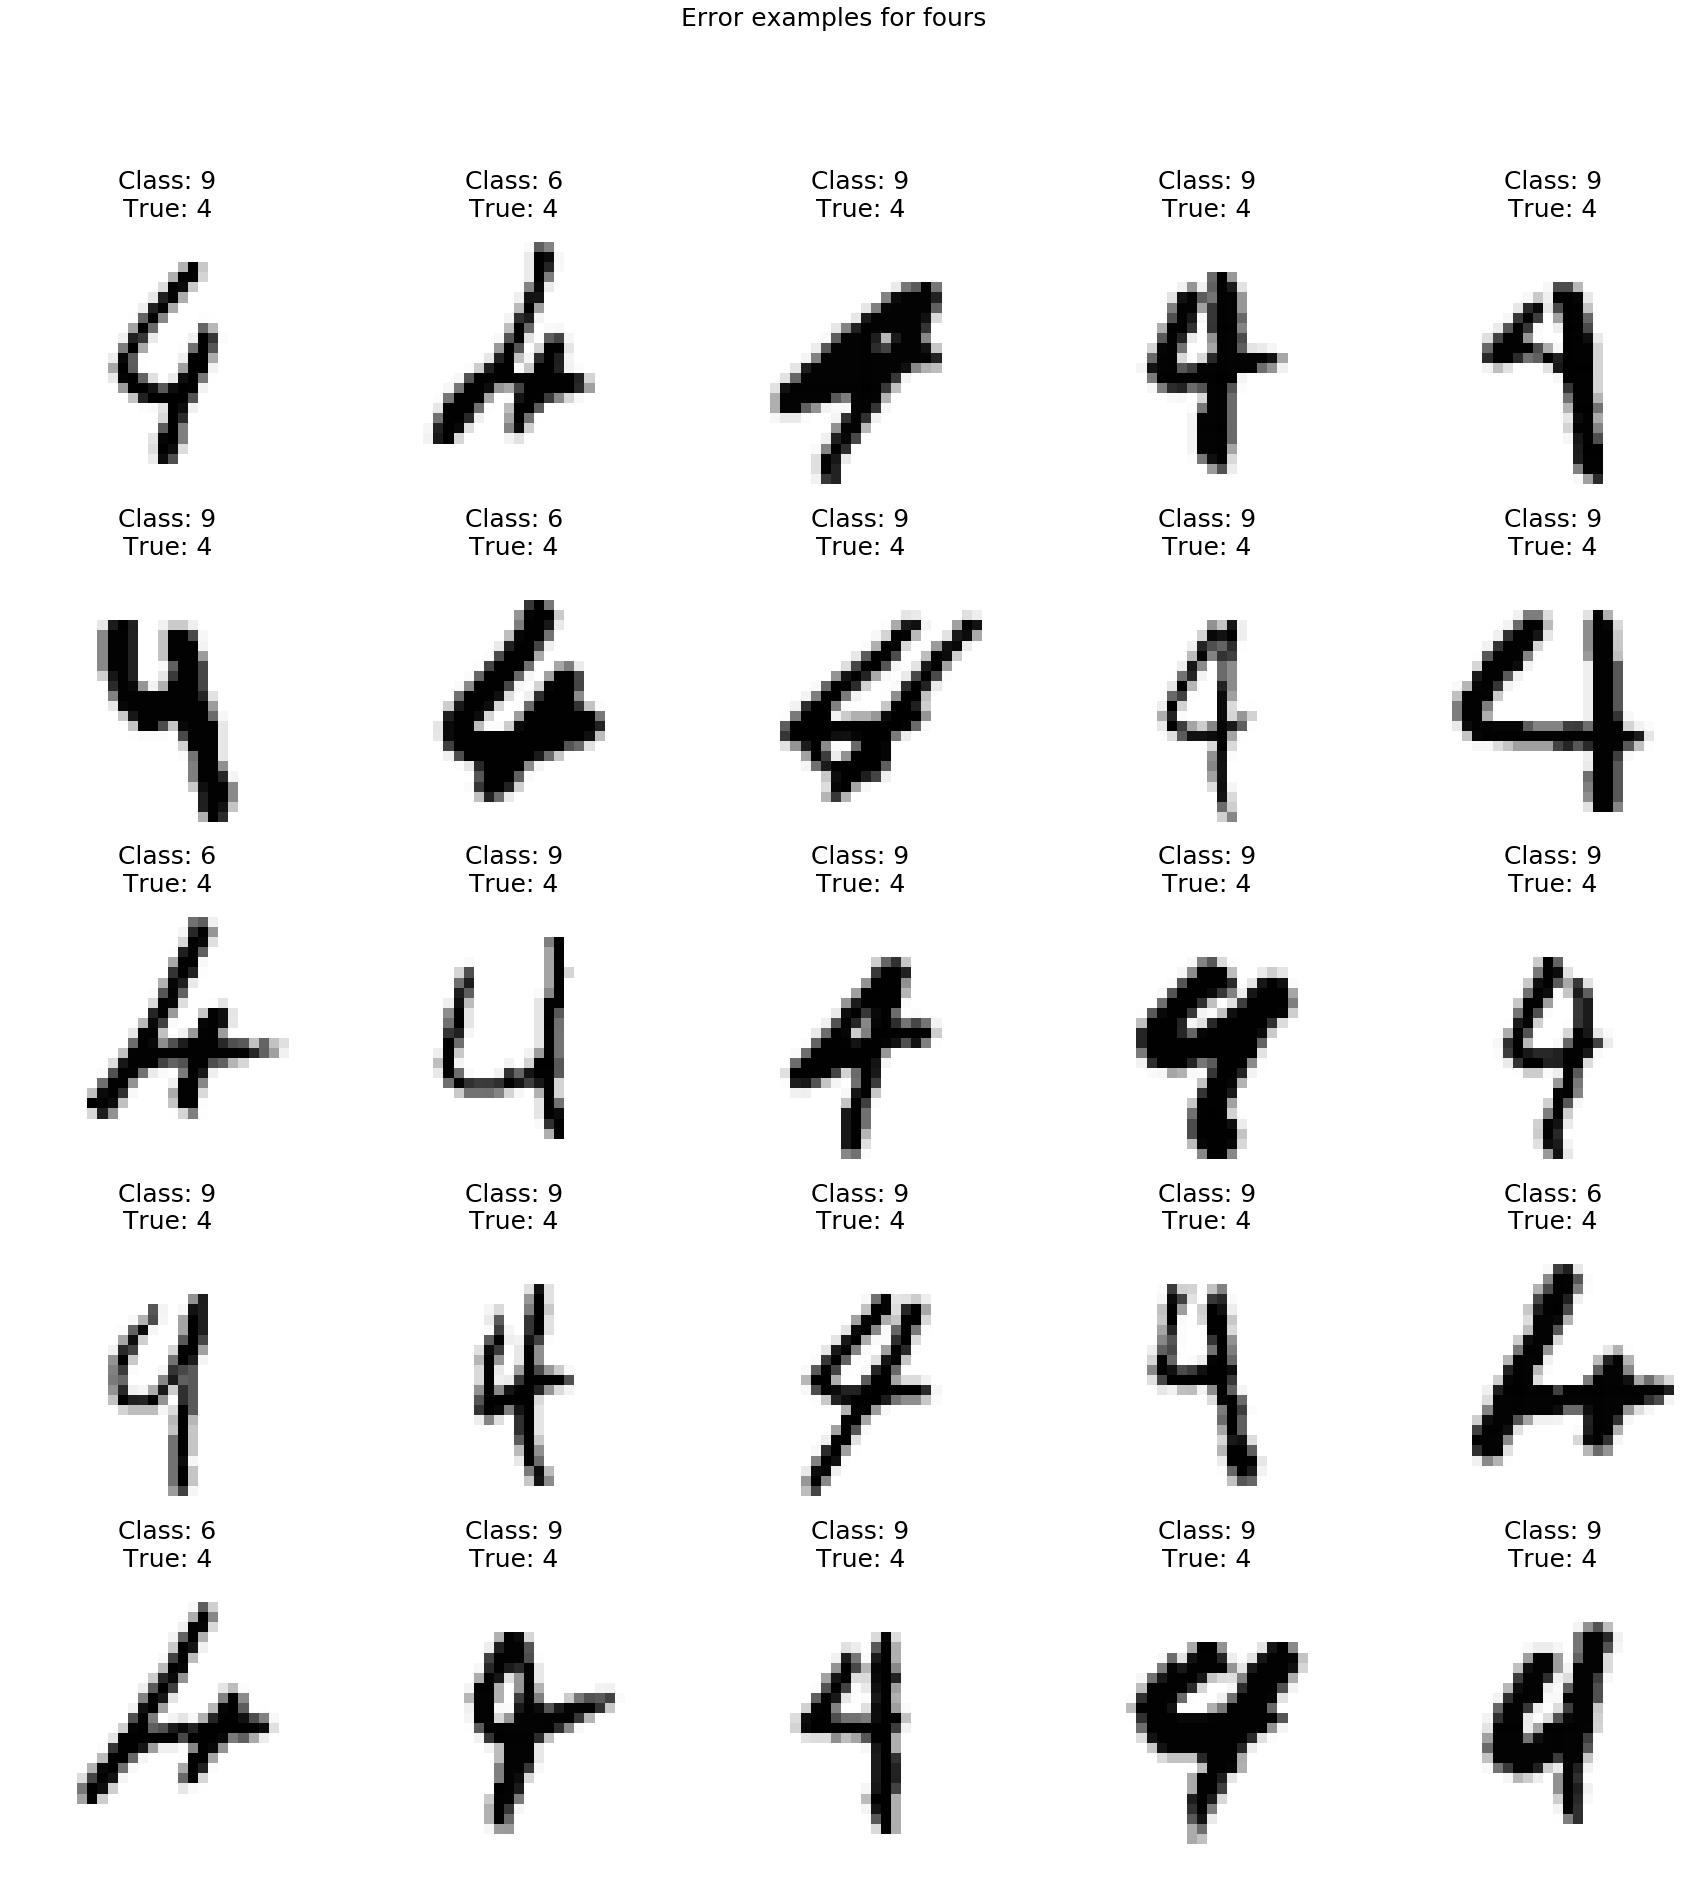

In [132]:
# создадим окружение
fig_4_fours, ax = plt.subplots()
fig_4_fours.set_figwidth(30)
fig_4_fours.set_figheight(30)
for i in range(25):
    curr = plt.subplot(5, 5, i + 1)
    curr.imshow(X_test[wrong_four_indices[i]].reshape(28, 28),
                   cmap='Greys')
    curr.set_title('Class: %i\n' % y_pred_4[wrong_four_indices[i]] + 'True: %i' % y_test[wrong_four_indices[i]], fontsize=25)
    curr.axis('off')
plt.suptitle('Error examples for fours',fontsize=25)

plt.savefig('fig_4_fours.pdf')

## 5
Размножить обучающую выборку с помощью поворотов, смещений и применений гауссовского фильтра. Разрешается использовать библиотеки для работы с изображениями. Подобрать по кросс-валидации с 3 фолдами параметры преобразований. Рассмотреть следующие параметры для преобразований и их комбинации:

(a) Величина поворота: 5, 10, 15 (в каждую из двух сторон)

(b) Величина смещения: 1, 2, 3 пикселя (по каждой из четырёх размерностей)

(c) Дисперсия фильтра Гаусса: 0.5, 1, 1.5

Проанализировать, как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое преобразование.

Замечание. Не обязательно хранить все обучающие выборки в процессе эксперимента. Достаточно вычислить ближайших соседей для каждой из выборок, а затем выбрать из них ближайших соседей.

In [235]:

def knn_cross_val_score_all(X, y, disp_value_list, shift_horizontal_list, \
                    shift_vertical_list, angle_list, score='accuracy', cv=None, **kwargs):
    if cv is None:
        cv = kfold(X.shape[0], 3)
    ans = {}
    for disp in disp_value_list:
        for shift_h in shift_horizontal_list:
            for shift_v in shift_vertical_list:
                for angle in angle_list:
                    ans[(disp, shift_h, shift_v, angle)] = np.empty(len(cv))
    knn = KNNClassifier(**kwargs)
    for ind, fold in enumerate(cv):
        for disp in disp_value_list:
            for shift_h in shift_horizontal_list:
                for shift_v in shift_vertical_list:
                    for angle in angle_list:
                        import scipy.ndimage as ndimage
                        from skimage.transform import rotate
                        X_modified_pos = X[fold[0], :].copy()
                        X_modified_neg = X[fold[0], :].copy()
                        for index in np.arange(X_modified_pos.shape[0]):
                            tmp_pos = X_modified_pos[index].reshape(28, 28)
                            tmp_neg = X_modified_pos[index].reshape(28, 28)
                            
                            tmp_pos = ndimage.shift(tmp_pos, [shift_v, shift_h])
                            tmp_neg = ndimage.shift(tmp_neg, [-shift_v, -shift_h])
                            
                            tmp_pos = ndimage.filters.gaussian_filter(tmp_pos, disp ** 0.5)
                            tmp_neg = ndimage.filters.gaussian_filter(tmp_neg, disp ** 0.5)
                            
                            X_modified_pos[index] = rotate(tmp_pos, angle).reshape(28 * 28)
                            X_modified_neg[index] = rotate(tmp_neg, -angle).reshape(28 * 28)
                            

                        knn.fit(np.vstack((X[fold[0], :], X_modified_pos, X_modified_neg)), np.concatenate((y[fold[0]], y[fold[0]], y[fold[0]])))
                        res = knn.predict(X[fold[1]])
                        ans[(disp, shift_h, shift_v, angle)][ind] \
                                = np.ones(res.shape[0], dtype=int)[res == y[fold[1]]].sum() / res.shape[0]
    return ans

In [242]:
%time cvs_for_rotations = knn_cross_val_score_all(X=X_train, y=y_train, angle_list=[0, 5, 10, 15], \
                                            shift_horizontal_list=[0], \
                                            shift_vertical_list=[0], \
                                            disp_value_list=[0], \
                                            k=4, metric='cosine', weights=True)

CPU times: user 58min 41s, sys: 1h 18min 26s, total: 2h 17min 7s
Wall time: 3h 20min 47s


In [244]:
cvs_for_rotations

{(0, 0, 0, 0): array([ 0.97475   ,  0.9734    ,  0.97375131]),
 (0, 0, 0, 5): array([ 0.9808    ,  0.9807    ,  0.98160092]),
 (0, 0, 0, 10): array([ 0.9809    ,  0.98095   ,  0.98170091]),
 (0, 0, 0, 15): array([ 0.97965   ,  0.979     ,  0.97855107])}

In [ ]:
%time cvs_for_horizontal_shifts = knn_cross_val_score_all(X=X_train, y=y_train, angle_list=[0], \
                                            shift_horizontal_list=[0, 1, 2, 3], \
                                            shift_vertical_list=[0], \
                                            disp_value_list=[0], \
                                            k=4, metric='cosine', weights=True)

In [239]:
cvs_for_horizontal_shifts

{(0, 0, 0, 0): array([ 0.96175191,  0.95740213,  0.96340183]),
 (0, 1, 0, 0): array([ 0.97090145,  0.96520174,  0.96895155]),
 (0, 2, 0, 0): array([ 0.96700165,  0.96235188,  0.96460177]),
 (0, 3, 0, 0): array([ 0.96565172,  0.96295185,  0.96355182])}

In [ ]:
%time cvs_for_vertical_shifts = knn_cross_val_score_all(X=X_train, y=y_train, angle_list=[0], \
                                            shift_horizontal_list=[0], \
                                            shift_vertical_list=[0, 1, 2, 3], \
                                            disp_value_list=[0], \
                                            k=4, metric='cosine', weights=True)

In [177]:
%time cvs_for_gaussian_filter = knn_cross_val_score_all(X=X_train, y=y_train[::3], angle_list=[0], \
                                            shift_horizontal_list=[0], \
                                            shift_vertical_list=[0], \
                                            disp_value_list=[0, 0.5, 1, 1.5], \
                                            k=4, metric='cosine', weights=True)

CPU times: user 2min 41s, sys: 14.9 s, total: 2min 56s
Wall time: 2min 16s


In [241]:
cvs_for_gaussian_filter

{(0, 0, 0, 0): array([ 0.96370181,  0.95935203,  0.95950202]),
 (0.5, 0, 0, 0): array([ 0.97120144,  0.96895155,  0.96925154]),
 (1, 0, 0, 0): array([ 0.97225139,  0.97135143,  0.97105145]),
 (1.5, 0, 0, 0): array([ 0.97105145,  0.97180141,  0.97075146])}

In [188]:
%time cvs_for_rotations_and_vertical_shifts = knn_cross_val_score_all(X=X_train[::3], y=y_train[::3], angle_list=[0, 5, -5, 10, -10, 15, -15], \
                                            shift_horizontal_list=[0], \
                                            shift_vertical_list=[0, 1, -1, 2, -2, 3, -3], \
                                            disp_value_list=[0], \
                                            k=4, metric='cosine', weights=True)

CPU times: user 30min 53s, sys: 3min 7s, total: 34min 1s
Wall time: 26min 35s


In [210]:
print(cvs_for_rotations_and_vertical_shifts.keys())

dict_keys([(0, 0, 0, 0), (0, 0, 0, 5), (0, 0, 0, -5), (0, 0, 0, 10), (0, 0, 0, -10), (0, 0, 0, 15), (0, 0, 0, -15), (0, 0, 1, 0), (0, 0, 1, 5), (0, 0, 1, -5), (0, 0, 1, 10), (0, 0, 1, -10), (0, 0, 1, 15), (0, 0, 1, -15), (0, 0, -1, 0), (0, 0, -1, 5), (0, 0, -1, -5), (0, 0, -1, 10), (0, 0, -1, -10), (0, 0, -1, 15), (0, 0, -1, -15), (0, 0, 2, 0), (0, 0, 2, 5), (0, 0, 2, -5), (0, 0, 2, 10), (0, 0, 2, -10), (0, 0, 2, 15), (0, 0, 2, -15), (0, 0, -2, 0), (0, 0, -2, 5), (0, 0, -2, -5), (0, 0, -2, 10), (0, 0, -2, -10), (0, 0, -2, 15), (0, 0, -2, -15), (0, 0, 3, 0), (0, 0, 3, 5), (0, 0, 3, -5), (0, 0, 3, 10), (0, 0, 3, -10), (0, 0, 3, 15), (0, 0, 3, -15), (0, 0, -3, 0), (0, 0, -3, 5), (0, 0, -3, -5), (0, 0, -3, 10), (0, 0, -3, -10), (0, 0, -3, 15), (0, 0, -3, -15)])


In [259]:
rotations_and_vertical_shifts_accuracy_fold_0 = [cvs_for_rotations_and_vertical_shifts[k][0] \
                                                 for k in list(cvs_for_rotations_and_vertical_shifts.keys())]
rotations_and_vertical_shifts_accuracy_fold_1 = [cvs_for_rotations_and_vertical_shifts[k][1] \
                                                 for k in list(cvs_for_rotations_and_vertical_shifts.keys())]
rotations_and_vertical_shifts_accuracy_fold_2 = [cvs_for_rotations_and_vertical_shifts[k][2] \
                                                 for k in list(cvs_for_rotations_and_vertical_shifts.keys())]
argmax_r_vs_0 = np.argmax(rotations_and_vertical_shifts_accuracy_fold_0)
print(list(cvs_for_rotations_and_vertical_shifts.keys())[argmax_r_vs_0])

argmax_r_vs_1 = np.argmax(rotations_and_vertical_shifts_accuracy_fold_1)

print(list(cvs_for_rotations_and_vertical_shifts.keys())[argmax_r_vs_1])

argmax_r_vs_2 = np.argmax(rotations_and_vertical_shifts_accuracy_fold_2)
print(list(cvs_for_rotations_and_vertical_shifts.keys())[argmax_r_vs_2])


print(max(np.mean(cvs_for_rotations_and_vertical_shifts[key]) for key in list(cvs_for_rotations_and_vertical_shifts.keys())))

(0, 0, 0, 10)
(0, 0, 1, 10)
(0, 0, 1, 5)
0.969151542423


In [223]:
%time cvs_for_rotations_and_horizontal_shifts = knn_cross_val_score_all(X=X_train[::3], y=y_train[::3], angle_list=[0, 5, -5, 10, -10, 15, -15], \
                                            shift_horizontal_list=[0, 1, -1, 2, -2, 3, -3], \
                                            shift_vertical_list=[0], \
                                            disp_value_list=[0], \
                                            k=4, metric='cosine', weights=True)

CPU times: user 31min 7s, sys: 3min 3s, total: 34min 11s
Wall time: 26min 16s


In [232]:
rotations_and_horizontal_shifts_accuracy_fold_0 = [cvs_for_rotations_and_horizontal_shifts[k][0] \
                                                 for k in list(cvs_for_rotations_and_horizontal_shifts.keys())]
rotations_and_horizontal_shifts_accuracy_fold_1 = [cvs_for_rotations_and_horizontal_shifts[k][1] \
                                                 for k in list(cvs_for_rotations_and_horizontal_shifts.keys())]
rotations_and_horizontal_shifts_accuracy_fold_2 = [cvs_for_rotations_and_horizontal_shifts[k][2] \
                                                 for k in list(cvs_for_rotations_and_horizontal_shifts.keys())]
argmax_hs_gf_0 = np.argmax(rotations_and_horizontal_shifts_accuracy_fold_0)

print(list(cvs_for_rotations_and_horizontal_shifts.keys())[argmax_r_vs_0])

argmax_r_vs_1 = np.argmax(rotations_and_horizontal_shifts_accuracy_fold_1)

print(list(cvs_for_rotations_and_horizontal_shifts.keys())[argmax_r_vs_1])

argmax_r_vs_2 = np.argmax(rotations_and_horizontal_shifts_accuracy_fold_2)

print(list(cvs_for_rotations_and_horizontal_shifts.keys())[argmax_r_vs_2])



(0, 0, 0, 10)
(0, 0, 0, -10)
(0, 0, 0, 10)


In [224]:
%time cvs_for_rotations_and_gaussian_filter = knn_cross_val_score_all(X=X_train[::3], y=y_train[::3], angle_list=[0, 5, -5, 10, -10, 15, -15], \
                                            shift_horizontal_list=[0], \
                                            shift_vertical_list=[0], \
                                            disp_value_list=[0, 0.5, 1, 1.5], \
                                            k=4, metric='cosine', weights=True)

CPU times: user 18min 25s, sys: 1min 43s, total: 20min 9s
Wall time: 15min 43s


In [231]:
rotations_and_gaussian_filter_accuracy_fold_0 = [cvs_for_rotations_and_gaussian_filter[k][0] \
                                                 for k in list(cvs_for_rotations_and_gaussian_filter.keys())]
rotations_and_gaussian_filter_accuracy_fold_1 = [cvs_for_rotations_and_gaussian_filter[k][1] \
                                                 for k in list(cvs_for_rotations_and_gaussian_filter.keys())]
rotations_and_gaussian_filter_accuracy_fold_2 = [cvs_for_rotations_and_gaussian_filter[k][2] \
                                                 for k in list(cvs_for_rotations_and_gaussian_filter.keys())]
argmax_hs_gf_0 = np.argmax(rotations_and_gaussian_filter_accuracy_fold_0)

print(list(cvs_for_rotations_and_gaussian_filter.keys())[argmax_r_vs_0])

argmax_r_vs_1 = np.argmax(rotations_and_gaussian_filter_accuracy_fold_1)

print(list(cvs_for_rotations_and_gaussian_filter.keys())[argmax_r_vs_1])

argmax_r_vs_2 = np.argmax(rotations_and_gaussian_filter_accuracy_fold_2)

print(list(cvs_for_rotations_and_gaussian_filter.keys())[argmax_r_vs_2])


(0, 0, 0, 10)
(1.5, 0, 0, -5)
(1.5, 0, 0, 5)


In [225]:
%time cvs_for_vertical_and_horizontal_shifts = knn_cross_val_score_all(X=X_train[::3], y=y_train[::3], angle_list=[0], \
                                            shift_horizontal_list=[0, 1, -1, 2, -2, 3, -3], \
                                            shift_vertical_list=[0, 1, -1, 2, -2, 3, -3], \
                                            disp_value_list=[0], \
                                            k=4, metric='cosine', weights=True)

CPU times: user 30min 18s, sys: 3min 1s, total: 33min 19s
Wall time: 25min 33s


In [229]:
vertical_and_horizontal_shifts_accuracy_fold_0 = [cvs_for_vertical_and_horizontal_shifts[k][0] \
                                                 for k in list(cvs_for_vertical_and_horizontal_shifts.keys())]
vertical_and_horizontal_shifts_accuracy_fold_1 = [cvs_for_vertical_and_horizontal_shifts[k][1] \
                                                 for k in list(cvs_for_vertical_and_horizontal_shifts.keys())]
vertical_and_horizontal_shifts_accuracy_fold_2 = [cvs_for_vertical_and_horizontal_shifts[k][2] \
                                                 for k in list(cvs_for_vertical_and_horizontal_shifts.keys())]
argmax_hs_gf_0 = np.argmax(vertical_and_horizontal_shifts_accuracy_fold_0)
print(list(cvs_for_vertical_and_horizontal_shifts.keys())[argmax_r_vs_0])

argmax_r_vs_1 = np.argmax(vertical_and_horizontal_shifts_accuracy_fold_1)

print(list(cvs_for_vertical_and_horizontal_shifts.keys())[argmax_r_vs_1])

argmax_r_vs_2 = np.argmax(vertical_and_horizontal_shifts_accuracy_fold_2)
print(list(cvs_for_vertical_and_horizontal_shifts.keys())[argmax_r_vs_2])

(0, 0, 2, 0)
(0, 1, 1, 0)
(0, 0, -1, 0)


In [226]:
%time cvs_for_vertical_shifts_and_gaussian_filter = knn_cross_val_score_all(X=X_train[::3], y=y_train[::3], angle_list=[0], \
                                            shift_horizontal_list=[0], \
                                            shift_vertical_list=[0, 1, -1, 2, -2, 3, -3], \
                                            disp_value_list=[0, 0.5, 1, 1.5], \
                                            k=4, metric='cosine', weights=True)

CPU times: user 18min 18s, sys: 1min 43s, total: 20min 2s
Wall time: 15min 35s


In [228]:
vertical_shifts_and_gaussian_filter_accuracy_fold_0 = [cvs_for_vertical_shifts_and_gaussian_filter[k][0] \
                                                 for k in list(cvs_for_vertical_shifts_and_gaussian_filter.keys())]
vertical_shifts_and_gaussian_filter_accuracy_fold_1 = [cvs_for_vertical_shifts_and_gaussian_filter[k][1] \
                                                 for k in list(cvs_for_vertical_shifts_and_gaussian_filter.keys())]
vertical_shifts_and_gaussian_filter_accuracy_fold_2 = [cvs_for_vertical_shifts_and_gaussian_filter[k][2] \
                                                 for k in list(cvs_for_vertical_shifts_and_gaussian_filter.keys())]
argmax_hs_gf_0 = np.argmax(vertical_shifts_and_gaussian_filter_accuracy_fold_0)
print(list(cvs_for_vertical_shifts_and_gaussian_filter.keys())[argmax_r_vs_0])

argmax_r_vs_1 = np.argmax(vertical_shifts_and_gaussian_filter_accuracy_fold_1)

print(list(cvs_for_vertical_shifts_and_gaussian_filter.keys())[argmax_r_vs_1])

argmax_r_vs_2 = np.argmax(vertical_shifts_and_gaussian_filter_accuracy_fold_2)
print(list(cvs_for_vertical_shifts_and_gaussian_filter.keys())[argmax_r_vs_2])

(0, 0, 2, 0)
(1, 0, 0, 0)
(1.5, 0, 0, 0)


In [200]:
%time cvs_for_horizontal_shifts_and_gaussian_filter = knn_cross_val_score_all(X=X_train[::3], y=y_train[::3], angle_list=[0], \
                                            shift_horizontal_list=[0, 1, -1, 2, -2, 3, -3], \
                                            shift_vertical_list=[0], \
                                            disp_value_list=[0, 0.5, 1, 1.5], \
                                            k=4, metric='cosine', weights=True)

CPU times: user 18min 31s, sys: 1min 51s, total: 20min 22s
Wall time: 16min 6s


In [222]:
horizontal_shifts_and_gaussian_filter_accuracy_fold_0 = [cvs_for_horizontal_shifts_and_gaussian_filter[k][0] \
                                                 for k in list(cvs_for_horizontal_shifts_and_gaussian_filter.keys())]
horizontal_shifts_and_gaussian_filter_accuracy_fold_1 = [cvs_for_horizontal_shifts_and_gaussian_filter[k][1] \
                                                 for k in list(cvs_for_horizontal_shifts_and_gaussian_filter.keys())]
horizontal_shifts_and_gaussian_filter_accuracy_fold_2 = [cvs_for_horizontal_shifts_and_gaussian_filter[k][2] \
                                                 for k in list(cvs_for_horizontal_shifts_and_gaussian_filter.keys())]
argmax_hs_gf_0 = np.argmax(horizontal_shifts_and_gaussian_filter_accuracy_fold_0)
print(list(cvs_for_horizontal_shifts_and_gaussian_filter.keys())[argmax_r_vs_0])

argmax_r_vs_1 = np.argmax(horizontal_shifts_and_gaussian_filter_accuracy_fold_1)

print(list(cvs_for_horizontal_shifts_and_gaussian_filter.keys())[argmax_r_vs_1])

argmax_r_vs_2 = np.argmax(horizontal_shifts_and_gaussian_filter_accuracy_fold_2)
print(list(cvs_for_horizontal_shifts_and_gaussian_filter.keys())[argmax_r_vs_2])

(0, 2, 0, 0)
(1, 0, 0, 0)
(1.5, 1, 0, 0)


Расширим обучающую выборку

In [317]:
X_shifted_h_pos = X_train.copy()
X_shifted_h_neg = X_train.copy()
X_shifted_v_pos = X_train.copy()
X_shifted_v_neg = X_train.copy()
X_rotated_pos = X_train.copy()
X_rotated_neg = X_train.copy()
X_filtered = X_train.copy()

import scipy.ndimage as ndimage
from skimage.transform import rotate


for index in np.arange(X_shifted_h_pos.shape[0]):
    tmp = X_shifted_h_pos[index].reshape(28, 28)
    X_shifted_h_pos[index] = ndimage.shift(tmp, [1, 0]).reshape(28 * 28)

print('h pos shift done')

for index in np.arange(X_shifted_h_neg.shape[0]):
    tmp = X_shifted_h_neg[index].reshape(28, 28)
    X_shifted_h_neg[index] = ndimage.shift(tmp, [-1, 0]).reshape(28 * 28)

print('h neg shift done') 

for index in np.arange(X_shifted_v_pos.shape[0]):
    tmp = X_shifted_v_pos[index].reshape(28, 28)
    X_shifted_v_pos[index] = ndimage.shift(tmp, [0, 1]).reshape(28 * 28)

print('v pos shift done')
for index in np.arange(X_shifted_v_neg.shape[0]):
    tmp = X_shifted_v_neg[index].reshape(28, 28)
    X_shifted_v_neg[index] = ndimage.shift(tmp, [0, -1]).reshape(28 * 28)
    
print('v neg shift done')    

for index in np.arange(X_rotated_pos.shape[0]):
    tmp = X_rotated_pos[index].reshape(28, 28)
    X_rotated_pos[index] = rotate(tmp, 10).reshape(28 * 28)

print('pos rotate done')    
for index in np.arange(X_rotated_neg.shape[0]):
    tmp = X_rotated_neg[index].reshape(28, 28)
    X_rotated_neg[index] = rotate(tmp, -10).reshape(28 * 28)


print('neg rotate done')
for index in np.arange(X_filtered.shape[0]):
    tmp = X_filtered[index].reshape(28, 28)
    X_filtered[index] = ndimage.filters.gaussian_filter(tmp, 1).reshape(28 * 28)

print('all done')

h pos shift done
h neg shift done
v pos shift done
v neg shift done
pos rotate done
neg rotate done
all done


In [318]:
best_classifier

In [319]:
best_classifier.fit(X=X_train, y=y_train)

In [320]:
train_dist, train_neighbors = best_classifier.find_kneighbors(X=X_test, return_distance=True)

In [321]:
best_classifier.fit(X=X_shifted_h_pos, y=y_train)

In [322]:
shited_h_pos_dist, shited_h_pos_neighbors = best_classifier.find_kneighbors(X=X_test, return_distance=True)

In [323]:
best_classifier.fit(X=X_shifted_h_neg, y=y_train)

In [324]:
shited_h_neg_dist, shited_h_neg_neighbors = best_classifier.find_kneighbors(X=X_test, return_distance=True)

In [325]:
best_classifier.fit(X=X_shifted_v_pos, y=y_train)

In [326]:
shited_v_pos_dist, shited_v_pos_neighbors = best_classifier.find_kneighbors(X=X_test, return_distance=True)

In [327]:
best_classifier.fit(X=X_shifted_v_neg, y=y_train)

In [328]:
shited_v_neg_dist, shited_v_neg_neighbors = best_classifier.find_kneighbors(X=X_test, return_distance=True)

In [329]:
best_classifier.fit(X=X_rotated_pos, y=y_train)

In [330]:
rotated_pos_dist, rotated_pos_neighbors = best_classifier.find_kneighbors(X=X_test, return_distance=True)

In [331]:
best_classifier.fit(X=X_rotated_neg, y=y_train)

In [332]:
rotated_neg_dist, rotated_neg_neighbors = best_classifier.find_kneighbors(X=X_test, return_distance=True)

In [333]:
best_classifier.fit(X=X_filtered, y=y_train)

In [334]:
filtered_dist, filtered_neighbors = best_classifier.find_kneighbors(X=X_test, return_distance=True)

In [9]:
def merge_distances(dist_1, neighbours_1, dist_2, neighbours_2):
    dist_res = dist_1.copy()
    neighbours_res = neighbours_1.copy()
    
    for index in np.arange(dist_1.shape[0]):
        tmp = np.concatenate((dist_1[index], dist_2[index]))
        tmp_ind = np.argsort(tmp)
        dist_res[index] = tmp[tmp_ind][:4]
        neighbours_res[index] = np.concatenate((neighbours_1[index], neighbours_2[index]))[tmp_ind][:4]
    return (dist_res, neighbours_res)

In [336]:
dist1, neig1 = merge_distances(train_dist, train_neighbors, shited_h_pos_dist, shited_h_pos_neighbors)

In [341]:
dist2, neig2 = merge_distances(shited_h_neg_dist, shited_h_neg_neighbors, shited_v_pos_dist, shited_v_pos_neighbors)

In [342]:
dist3, neig3 = merge_distances(shited_v_neg_dist, shited_v_neg_neighbors, rotated_pos_dist, rotated_pos_neighbors)

In [343]:
dist4, neig4 = merge_distances(rotated_neg_dist, rotated_neg_neighbors, filtered_dist, filtered_neighbors)

In [344]:
dist12, neig12 = merge_distances(dist1, neig1, dist2, neig2)

In [345]:
dist34, neig34 = merge_distances(dist3, neig3, dist4, neig4)

In [346]:
dist_res, neig_res = merge_distances(dist12, neig12, dist34, neig34)

In [348]:
weights = (dist_res + (10 ** (-5))) ** (-1)

In [353]:
res = np.empty(neig_res.shape[0], dtype=int)
for i in range(neig_res.shape[0]):
    res[i] = np.argmax(np.bincount(y_train[neig_res[i]], weights[i]))

y_pred_5 = res
np.ones(res.shape[0], dtype=int)[res == y_test].sum() / res.shape[0]


0.984998499849985

In [354]:
conf_matr_5 = confusion_matrix(y_true=y_test, y_pred=y_pred_5)

In [355]:
conf_matr_5

array([[ 975,    0,    0,    0,    0,    0,    3,    1,    0,    0],
       [   0, 1132,    3,    0,    0,    0,    0,    0,    0,    0],
       [   5,    1, 1013,    0,    1,    0,    2,   10,    0,    0],
       [   0,    0,    2,  992,    1,    4,    0,    3,    4,    4],
       [   0,    0,    0,    0,  962,    0,    4,    2,    0,   14],
       [   2,    0,    0,    5,    1,  875,    6,    1,    0,    2],
       [   2,    2,    0,    0,    0,    1,  953,    0,    0,    0],
       [   1,    7,    4,    0,    0,    0,    0, 1009,    0,    7],
       [   2,    0,    3,    2,    2,    4,    3,    4,  952,    2],
       [   1,    3,    1,    3,    5,    2,    1,    4,    3,  986]])

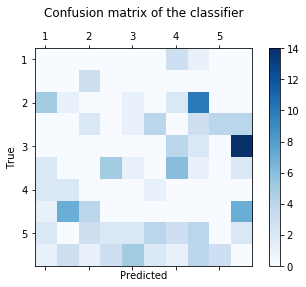

In [356]:
for i in range(10):
    conf_matr_5[i, i] = 0
fig_conf_matr_5, ax = plt.subplots()
cax = ax.matshow(conf_matr_5, cmap='Blues')
plt.title('Confusion matrix of the classifier\n')
fig_conf_matr_5.colorbar(cax)
ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticklabels(list(range(0, 10, 1)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('fig_5_conf_matrix.pdf')

Confusion matrix, without normalization
[[ 0  0  0  0  0  0  3  1  0  0]
 [ 0  0  3  0  0  0  0  0  0  0]
 [ 5  1  0  0  1  0  2 10  0  0]
 [ 0  0  2  0  1  4  0  3  4  4]
 [ 0  0  0  0  0  0  4  2  0 14]
 [ 2  0  0  5  1  0  6  1  0  2]
 [ 2  2  0  0  0  1  0  0  0  0]
 [ 1  7  4  0  0  0  0  0  0  7]
 [ 2  0  3  2  2  4  3  4  0  2]
 [ 1  3  1  3  5  2  1  4  3  0]]
Normalized confusion matrix
[[ 0.    0.    0.    0.    0.    0.    0.75  0.25  0.    0.  ]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.26  0.05  0.    0.    0.05  0.    0.11  0.53  0.    0.  ]
 [ 0.    0.    0.11  0.    0.06  0.22  0.    0.17  0.22  0.22]
 [ 0.    0.    0.    0.    0.    0.    0.2   0.1   0.    0.7 ]
 [ 0.12  0.    0.    0.29  0.06  0.    0.35  0.06  0.    0.12]
 [ 0.4   0.4   0.    0.    0.    0.2   0.    0.    0.    0.  ]
 [ 0.05  0.37  0.21  0.    0.    0.    0.    0.    0.    0.37]
 [ 0.09  0.    0.14  0.09  0.09  0.18  0.14  0.18  0.    0.09]
 [ 0.04  0.13  0.04  0.13  0.22  0

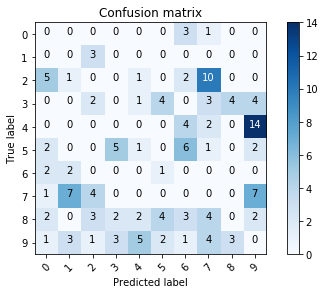

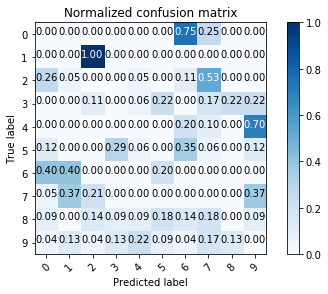

In [436]:
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_5)
for i in range(10):
    cnf_matrix[i, i] = 0
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.savefig('fig_5_conf_matrix.pdf')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [357]:
errors_5 = y_test == res

In [378]:
seven_indices_5 = np.arange(y_test.shape[0])[y_test == 8]
wrong_seven_indices_5 = np.arange(y_test.shape[0])[y_test == 7][y_pred_5[y_test == 7] != 7]
wrong_seven_indices_5.shape

(19,)

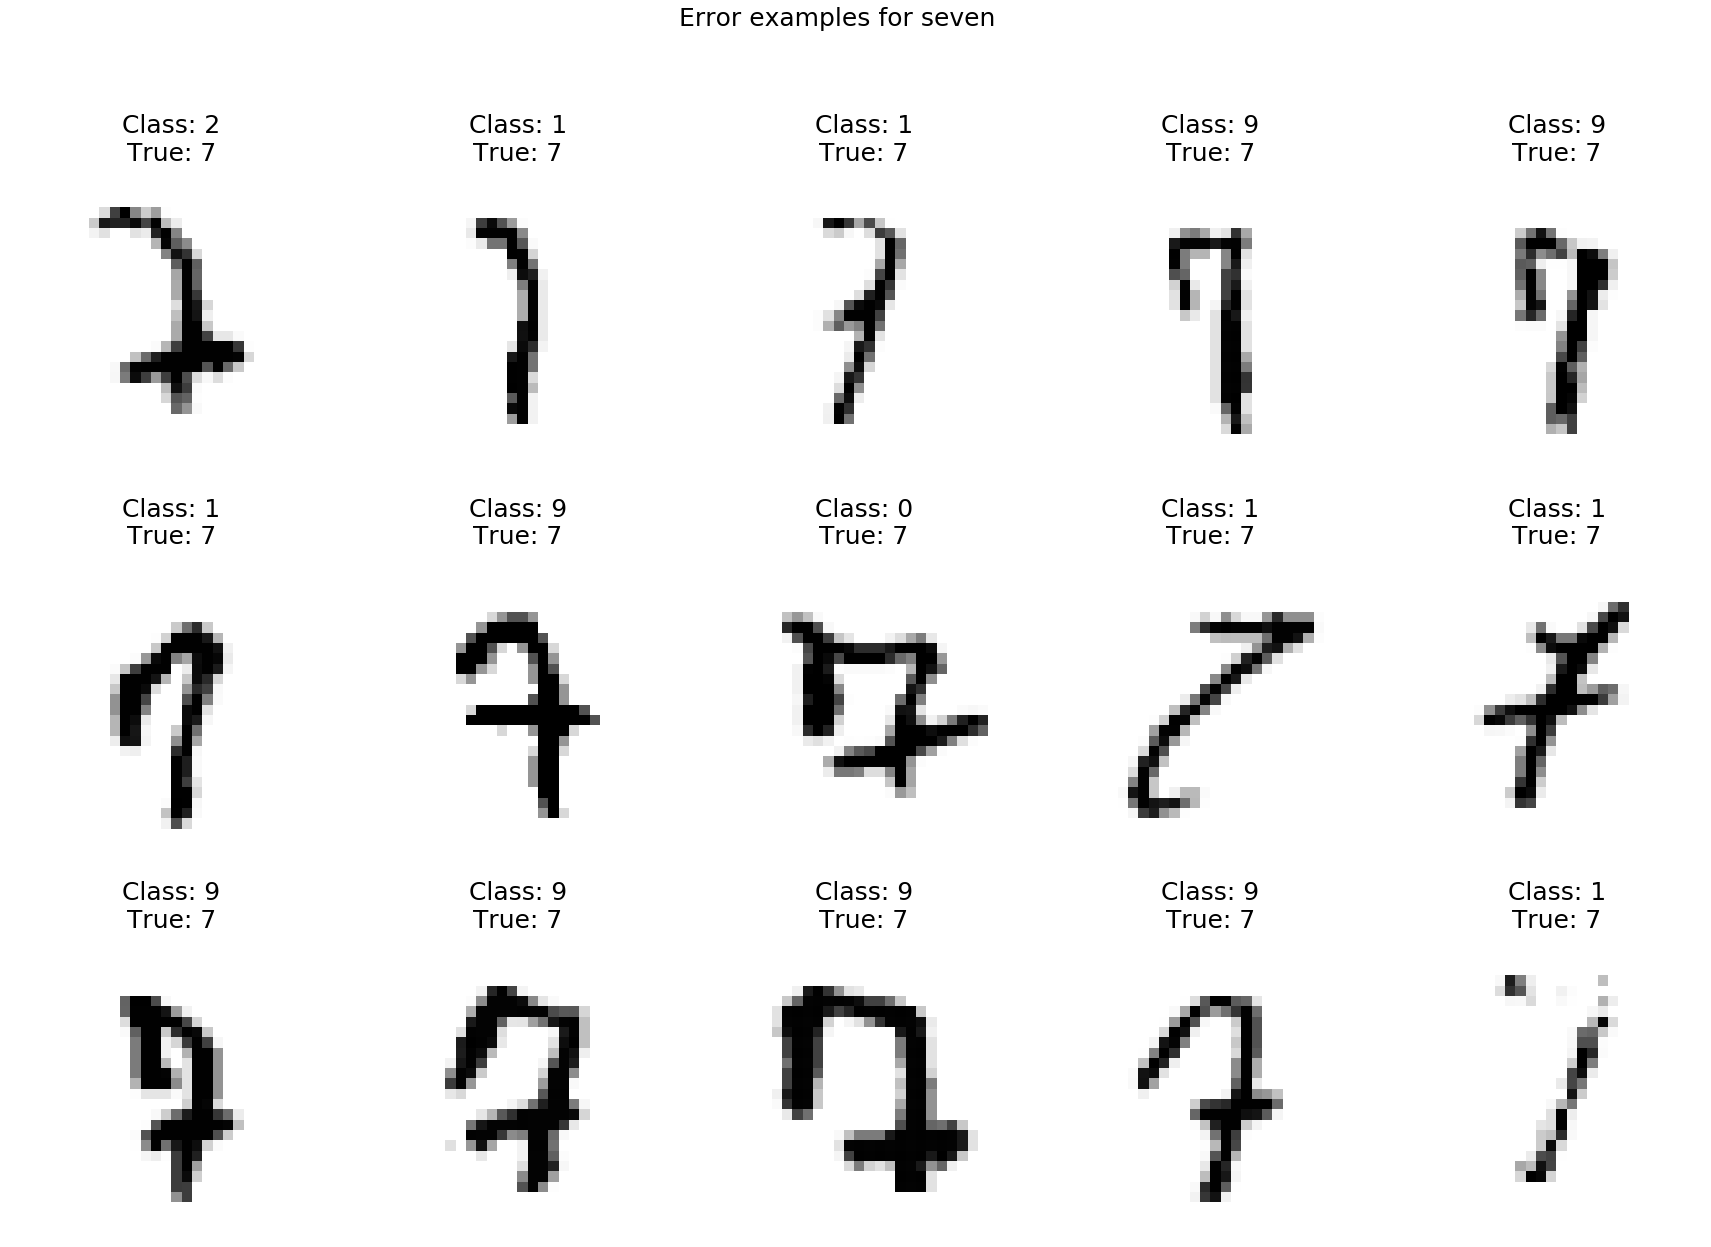

In [382]:
# создадим окружение
fig_5_seven, ax = plt.subplots()
fig_5_seven.set_figwidth(30)
fig_5_seven.set_figheight(20)
for i in range(15):
    curr = plt.subplot(3, 5, i + 1)
    curr.imshow(X_test[wrong_seven_indices_5[i]].reshape(28, 28),
                   cmap='Greys')
    curr.set_title('Class: %i\n' % y_pred_5[wrong_seven_indices_5[i]] + 'True: %i' % y_test[wrong_seven_indices_5[i]], fontsize=25)
    curr.axis('off')
plt.suptitle('Error examples for seven',fontsize=25)

plt.savefig('fig_5_seven.pdf')

In [383]:
wrong_four_indices_5 = np.arange(y_test.shape[0])[y_test == 4][y_pred_5[y_test == 4] != 4]
wrong_four_indices_5.shape

(20,)

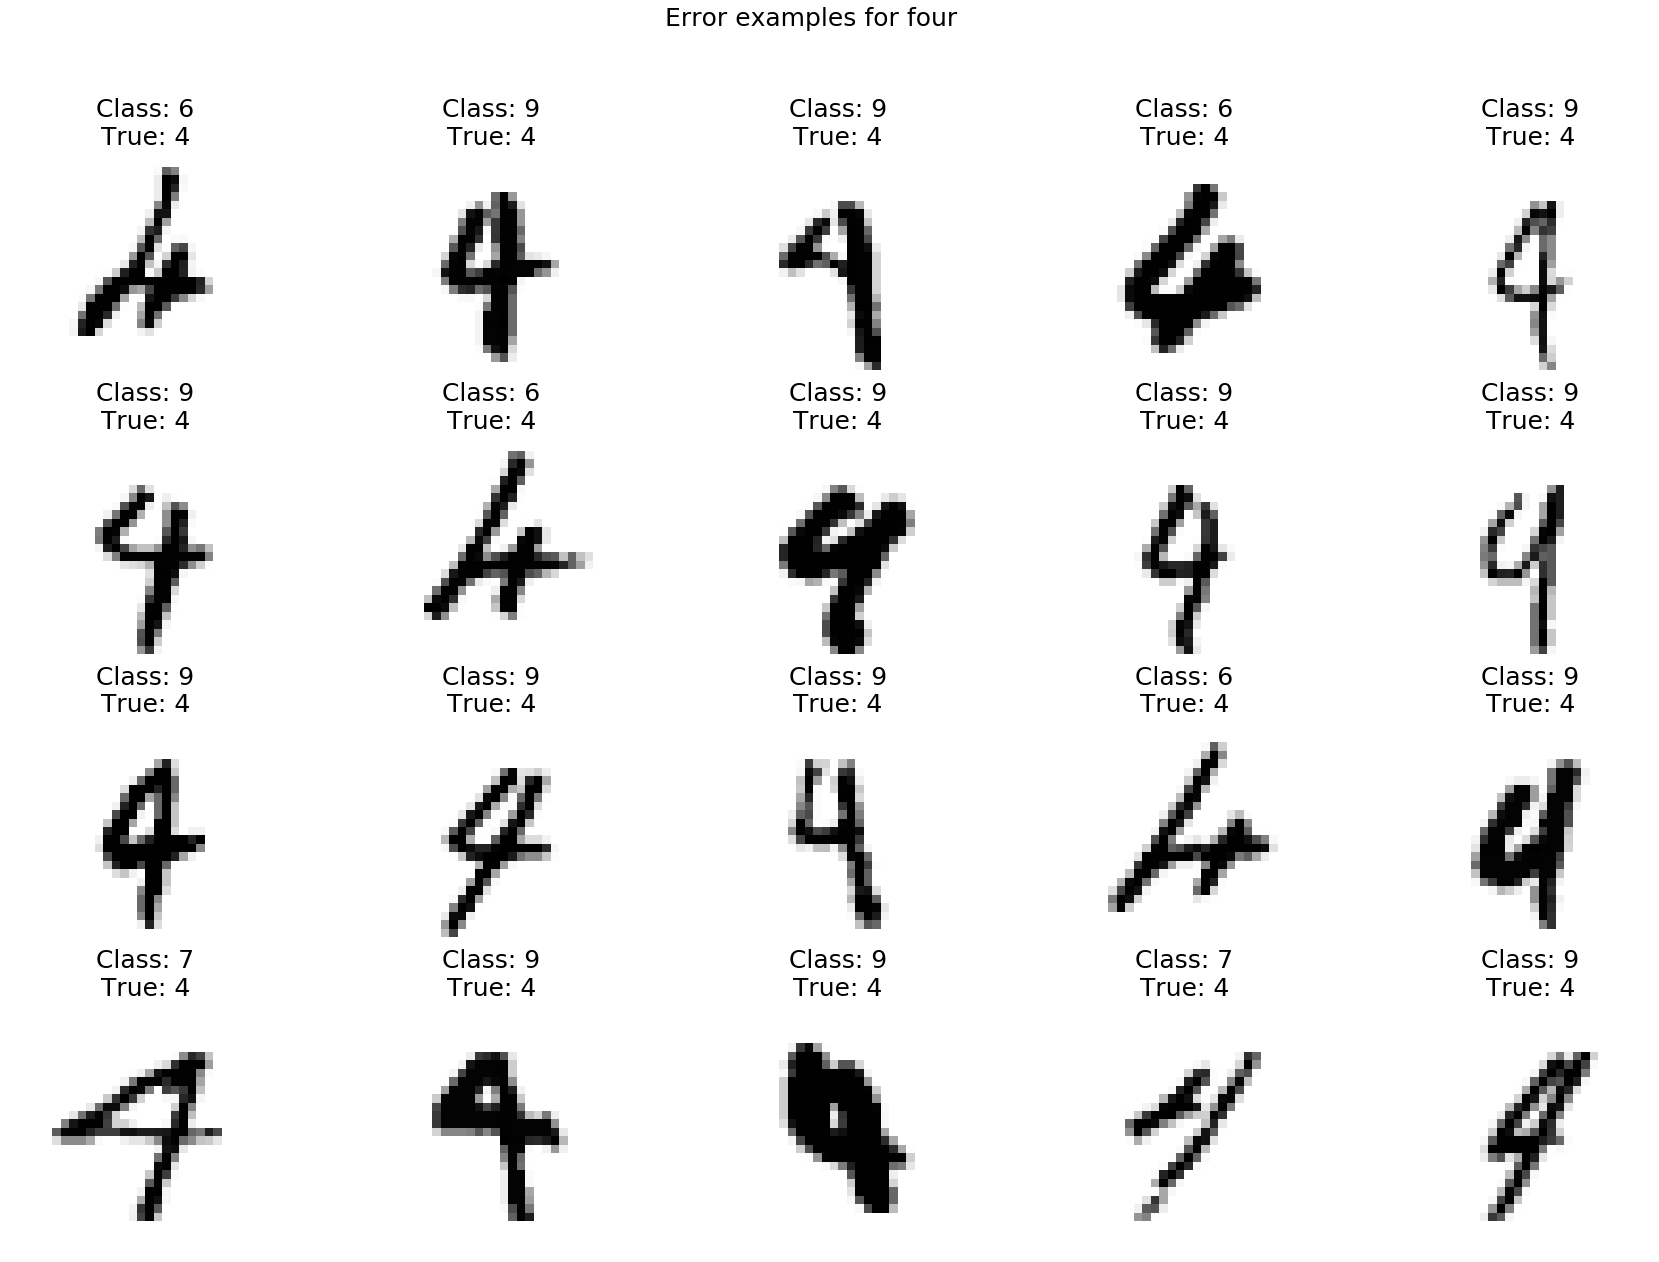

In [384]:
# создадим окружение
fig_5_four, ax = plt.subplots()
fig_5_four.set_figwidth(30)
fig_5_four.set_figheight(20)
for i in range(20):
    curr = plt.subplot(4, 5, i + 1)
    curr.imshow(X_test[wrong_four_indices_5[i]].reshape(28, 28),
                   cmap='Greys')
    curr.set_title('Class: %i\n' % y_pred_5[wrong_four_indices_5[i]] + 'True: %i' % y_test[wrong_four_indices_5[i]], fontsize=25)
    curr.axis('off')
plt.suptitle('Error examples for four',fontsize=25)

plt.savefig('fig_5_four.pdf')

In [385]:
wrong_three_indices_5 = np.arange(y_test.shape[0])[y_test == 3][y_pred_5[y_test == 3] != 3]
wrong_three_indices_5.shape

(18,)

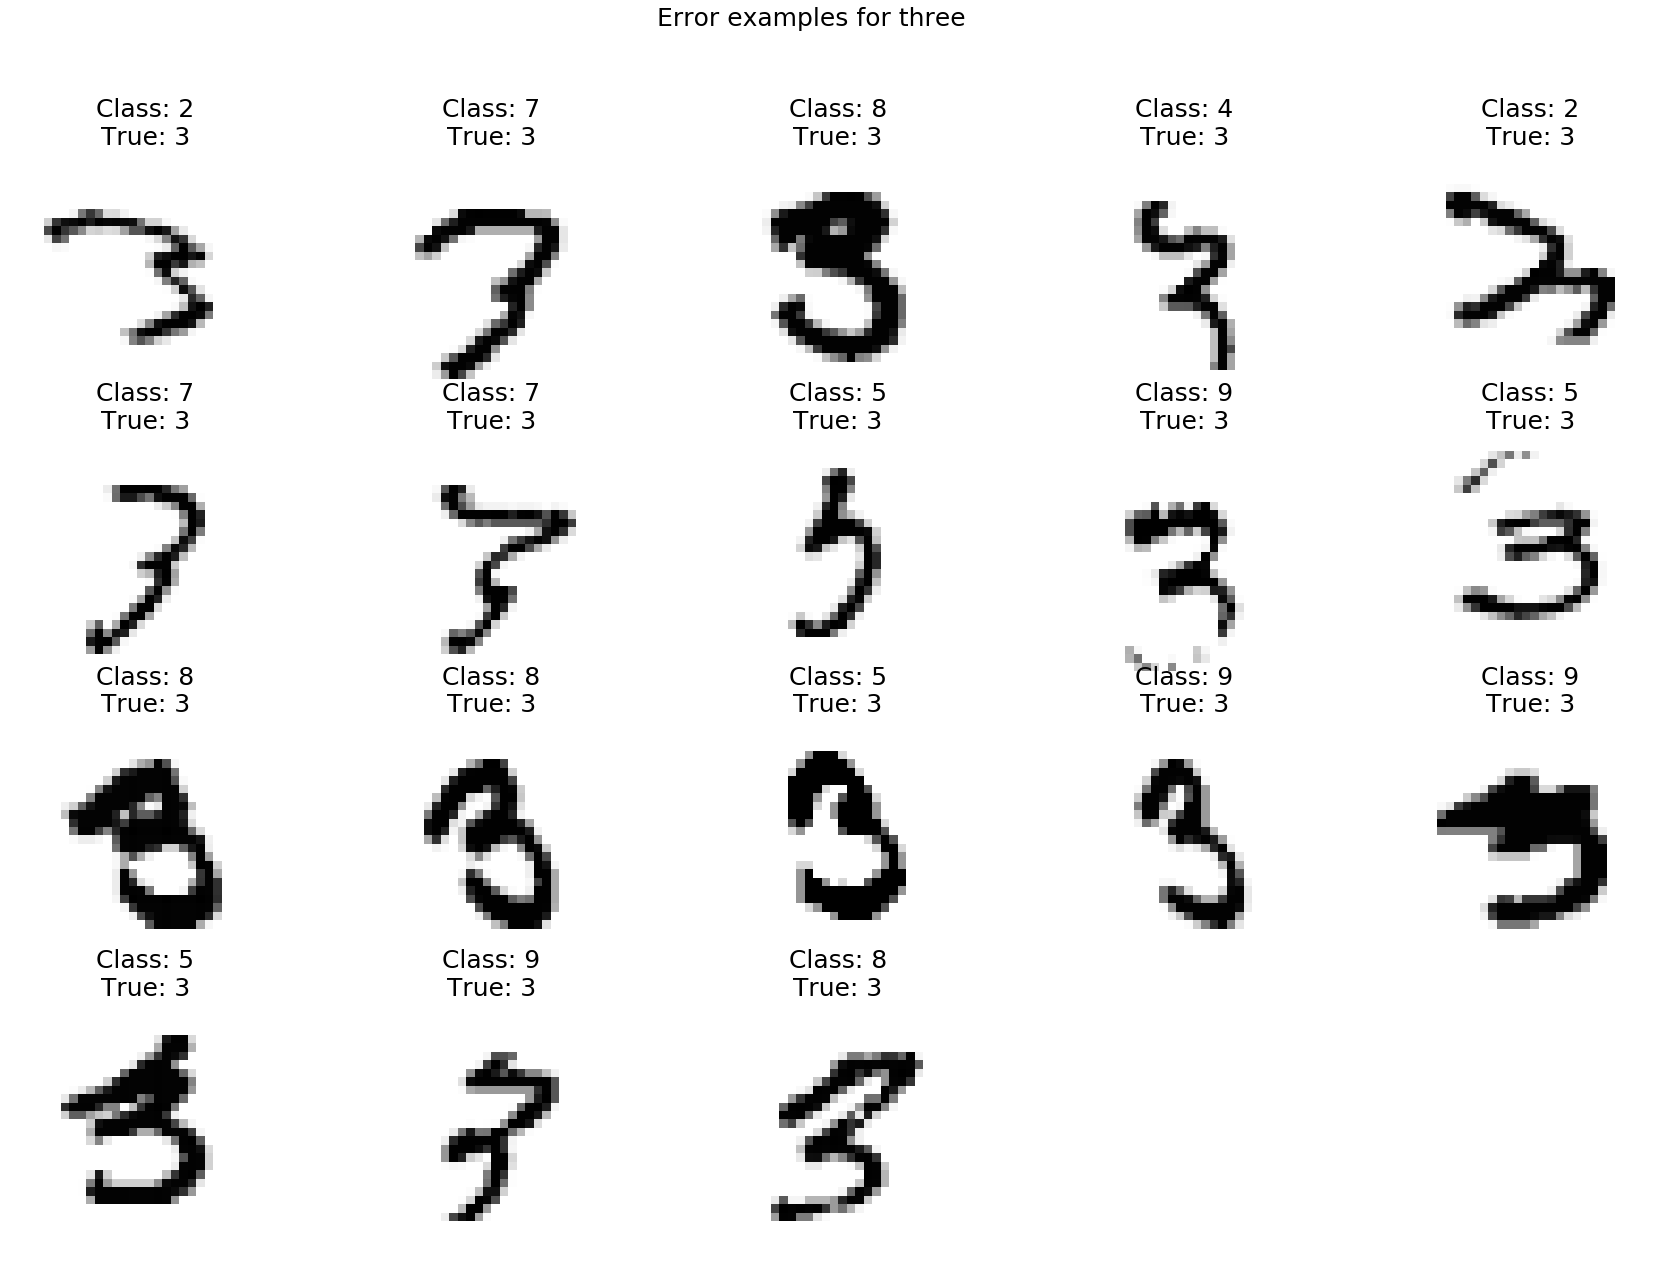

In [395]:
# создадим окружение
fig_5_three, ax = plt.subplots()
fig_5_three.set_figwidth(30)
fig_5_three.set_figheight(20)
for i in range(18):
    curr = plt.subplot(4, 5, i + 1)
    curr.imshow(X_test[wrong_three_indices_5[i]].reshape(28, 28),
                   cmap='Greys')
    curr.set_title('Class: %i\n' % y_pred_5[wrong_three_indices_5[i]] + 'True: %i' % y_test[wrong_three_indices_5[i]], fontsize=25)
    curr.axis('off')
plt.suptitle('Error examples for three',fontsize=25)

plt.savefig('fig_5_three.pdf')

## 6
Реализовать описанный выше алгоритм, основанный на преобразовании объектов тестовой выборки. Проверить то же самое множество параметров, что и в предыдущем пункте. Проанализировать как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое преобразование. Качественно срав- нить два подхода (5 и 6 пункты) между собой.


In [8]:
X_test_shifted_h_pos = X_test.copy()
X_test_shifted_h_neg = X_test.copy()
X_test_shifted_v_pos = X_test.copy()
X_test_shifted_v_neg = X_test.copy()
X_test_rotated_pos = X_test.copy()
X_test_rotated_neg = X_test.copy()
X_test_filtered = X_test.copy()

import scipy.ndimage as ndimage
from skimage.transform import rotate


for index in np.arange(X_test_shifted_h_pos.shape[0]):
    tmp = X_test_shifted_h_pos[index].reshape(28, 28)
    X_test_shifted_h_pos[index] = ndimage.shift(tmp, [1, 0]).reshape(28 * 28)

print('h pos shift done')

for index in np.arange(X_test_shifted_h_neg.shape[0]):
    tmp = X_test_shifted_h_neg[index].reshape(28, 28)
    X_test_shifted_h_neg[index] = ndimage.shift(tmp, [-1, 0]).reshape(28 * 28)

print('h neg shift done') 

for index in np.arange(X_test_shifted_v_pos.shape[0]):
    tmp = X_test_shifted_v_pos[index].reshape(28, 28)
    X_test_shifted_v_pos[index] = ndimage.shift(tmp, [0, 1]).reshape(28 * 28)

print('v pos shift done')
for index in np.arange(X_test_shifted_v_neg.shape[0]):
    tmp = X_test_shifted_v_neg[index].reshape(28, 28)
    X_test_shifted_v_neg[index] = ndimage.shift(tmp, [0, -1]).reshape(28 * 28)
    
print('v neg shift done')    

for index in np.arange(X_test_rotated_pos.shape[0]):
    tmp = X_test_rotated_pos[index].reshape(28, 28)
    X_test_rotated_pos[index] = rotate(tmp, 10).reshape(28 * 28)

print('pos rotate done')    
for index in np.arange(X_test_rotated_neg.shape[0]):
    tmp = X_test_rotated_neg[index].reshape(28, 28)
    X_test_rotated_neg[index] = rotate(tmp, -10).reshape(28 * 28)


print('neg rotate done')
for index in np.arange(X_test_filtered.shape[0]):
    tmp = X_test_filtered[index].reshape(28, 28)
    X_test_filtered[index] = ndimage.filters.gaussian_filter(tmp, 1).reshape(28 * 28)

print('all done')

h pos shift done
h neg shift done
v pos shift done
v neg shift done
pos rotate done
neg rotate done
all done


In [397]:
best_classifier.fit(X=X_train, y=y_train)

In [398]:
pred_6_filt = best_classifier.predict(X_test_filtered)

In [399]:
pred_6_s_h_p = best_classifier.predict(X_test_shifted_h_pos)

In [400]:
pred_6_s_h_n = best_classifier.predict(X_test_shifted_h_neg)

In [401]:
pred_6_s_v_p = best_classifier.predict(X_test_shifted_v_pos)

In [402]:
pred_6_s_v_n = best_classifier.predict(X_test_shifted_v_neg)

In [403]:
pred_6_r_p = best_classifier.predict(X_test_rotated_pos)

In [404]:
pred_6_r_n = best_classifier.predict(X_test_rotated_neg)

In [406]:
pred_6 = np.concatenate((y_pred_4, pred_6_filt, pred_6_r_n, \
                         pred_6_r_p, pred_6_s_h_n, pred_6_s_h_p, pred_6_s_v_n, pred_6_s_v_p))

In [408]:
y_test_6= np.concatenate((y_test, y_test, y_test, \
                         y_test, y_test, y_test, y_test, y_test))
accuracy_6 = np.ones(pred_6.shape[0], dtype=int)[pred_6 == y_test_6].sum() / pred_6.shape[0]

In [409]:
accuracy_6

0.95939593959395941

Confusion matrix, without normalization
[[  0   6  14   1   1   4  26   7   5   3]
 [  2   0  19  12  27   1  18  41   2   2]
 [110   9   0  20   9   0  16 103  57   6]
 [ 25   9  31   0   3  85   2  47 101  43]
 [ 25  46   7   0   0   0  68  15  11 264]
 [ 48   4   3 137   7   0 113  11  70  44]
 [ 66  27   0   2   9  32   0   0  10   0]
 [ 22 132  58   2  28   2   0   0   8 150]
 [ 49  25  30 108  26  49  48  48   0  63]
 [ 62  53  23  49 114  30   9 117  57   0]]
Normalized confusion matrix
[[ 0.    0.09  0.21  0.01  0.01  0.06  0.39  0.1   0.07  0.04]
 [ 0.02  0.    0.15  0.1   0.22  0.01  0.15  0.33  0.02  0.02]
 [ 0.33  0.03  0.    0.06  0.03  0.    0.05  0.31  0.17  0.02]
 [ 0.07  0.03  0.09  0.    0.01  0.25  0.01  0.14  0.29  0.12]
 [ 0.06  0.11  0.02  0.    0.    0.    0.16  0.03  0.03  0.61]
 [ 0.11  0.01  0.01  0.31  0.02  0.    0.26  0.03  0.16  0.1 ]
 [ 0.45  0.18  0.    0.01  0.06  0.22  0.    0.    0.07  0.  ]
 [ 0.05  0.33  0.14  0.    0.07  0.    0.    0.    0.02  0.3

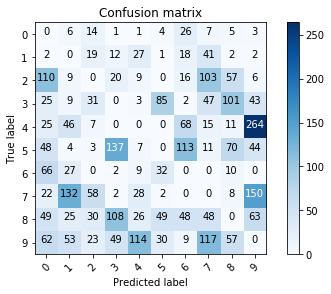

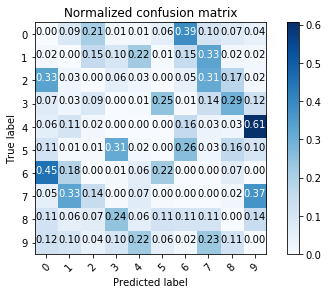

In [437]:
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_6, pred_6)
for i in range(10):
    cnf_matrix[i, i] = 0
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.savefig('fig_6_conf_matrix.pdf')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [5]:
last_classifier = KNNClassifier(k=4, metric='cosine', weights=True)

In [6]:
last_classifier.fit(X=X_train, y=y_train)

In [10]:
from telepyth import TelepythClient

tp = TelepythClient()

Use token from .telepythrc.


In [17]:
X_test.shape

(9999, 784)

In [20]:
y_pred_last = np.empty(1000)
tp.send_text('start')
for index in np.arange(1000):
    if (index % 100 == 5):
        print(index)
    X_tmp = np.vstack((X_test[index], \
                       X_test_filtered[index], \
                       X_test_rotated_neg[index], \
                      X_test_rotated_pos[index], \
                      X_test_shifted_h_neg[index], \
                      X_test_shifted_h_pos[index], \
                      X_test_shifted_v_neg[index], \
                      X_test_shifted_v_pos[index]))
    dist, neighbors = last_classifier.find_kneighbors(X=X_tmp, return_distance=True)
    tmp = np.argsort(dist, axis=None)[:4]
    weights = (dist.ravel()[tmp] + (10 ** (-5))) ** (-1)
    y_pred_last[index] = np.argmax(np.bincount(y_train[neighbors.ravel()[tmp]], weights))
tp.send_text('all finished')   
    

5
105
205
305
405
505
605
705
805
905


200

In [24]:
y_pred_last_2 = np.empty(2000)
y_pred_last_2[:1000] = y_pred_last
tp.send_text('start')
for index in np.arange(1000, 2000):
    if (index % 100 == 5):
        print(index)
    X_tmp = np.vstack((X_test[index], \
                       X_test_filtered[index], \
                       X_test_rotated_neg[index], \
                      X_test_rotated_pos[index], \
                      X_test_shifted_h_neg[index], \
                      X_test_shifted_h_pos[index], \
                      X_test_shifted_v_neg[index], \
                      X_test_shifted_v_pos[index]))
    dist, neighbors = last_classifier.find_kneighbors(X=X_tmp, return_distance=True)
    tmp = np.argsort(dist, axis=None)[:4]
    weights = (dist.ravel()[tmp] + (10 ** (-5))) ** (-1)
    y_pred_last_2[index] = np.argmax(np.bincount(y_train[neighbors.ravel()[tmp]], weights))
tp.send_text('all finished') 

1005
1105
1205
1305
1405
1505
1605
1705
1805
1905


200

In [32]:
y_pred_last_4 = np.empty(y_test.shape)
tp.send_text('start')
for index in np.arange(X_test.shape[0]):
    if (index % 100 == 5):
        print(index)
    X_tmp = np.vstack((X_test[index], \
                       X_test_filtered[index], \
                       X_test_rotated_neg[index], \
                      X_test_rotated_pos[index], \
                      X_test_shifted_h_neg[index], \
                      X_test_shifted_h_pos[index], \
                      X_test_shifted_v_neg[index], \
                      X_test_shifted_v_pos[index]))
    dist, neighbors = last_classifier.find_kneighbors(X=X_tmp, return_distance=True)
    tmp = np.argsort(dist, axis=None)[:4]
    weights = (dist.ravel()[tmp] + (10 ** (-5))) ** (-1)
    y_pred_last_4[index] = np.argmax(np.bincount(y_train[neighbors.ravel()[tmp]], weights))
tp.send_text('all finished') 

5
105
205
305
405
505
605
705
805
905
1005
1105
1205
1305
1405
1505
1605
1705
1805
1905
2005
2105
2205
2305
2405
2505
2605
2705
2805
2905
3005
3105
3205
3305
3405
3505
3605
3705
3805
3905
4005
4105
4205
4305
4405
4505
4605
4705
4805
4905
5005
5105
5205
5305
5405
5505
5605
5705
5805
5905
6005
6105
6205
6305
6405
6505
6605
6705
6805
6905
7005
7105
7205
7305
7405
7505
7605
7705
7805
7905
8005
8105
8205
8305
8405
8505
8605
8705
8805
8905
9005
9105
9205
9305
9405
9505
9605
9705
9805
9905


200

In [33]:
accuracy_last = np.ones(y_pred_last_4.shape[0], dtype=int)[y_pred_last_4 == y_test].sum() / y_pred_last_4.shape[0]

In [34]:
accuracy_last

0.96989698969896987

In [36]:
conf_matr = confusion_matrix(y_true=y_test, y_pred=y_pred_last_4)

Confusion matrix, without normalization
[[ 0  1  0  0  0  0  1  1  0  0]
 [ 0  0  2  1  0  0  0  0  0  0]
 [10  0  0  2  0  0  1 10  6  0]
 [ 2  0  2  0  0  6  0  5 13  6]
 [ 3  3  1  0  0  0  9  2  0 41]
 [ 6  2  0 17  1  0 13  0  7  5]
 [ 4  3  0  0  2  1  0  0  1  0]
 [ 3 15  7  0  0  0  0  0  1 10]
 [ 5  6  2  4  1  3  3  6  0  2]
 [ 8 10  1  3  4  3  1  6  7  0]]
Normalized confusion matrix
[[ 0.    0.33  0.    0.    0.    0.    0.33  0.33  0.    0.  ]
 [ 0.    0.    0.67  0.33  0.    0.    0.    0.    0.    0.  ]
 [ 0.34  0.    0.    0.07  0.    0.    0.03  0.34  0.21  0.  ]
 [ 0.06  0.    0.06  0.    0.    0.18  0.    0.15  0.38  0.18]
 [ 0.05  0.05  0.02  0.    0.    0.    0.15  0.03  0.    0.69]
 [ 0.12  0.04  0.    0.33  0.02  0.    0.25  0.    0.14  0.1 ]
 [ 0.36  0.27  0.    0.    0.18  0.09  0.    0.    0.09  0.  ]
 [ 0.08  0.42  0.19  0.    0.    0.    0.    0.    0.03  0.28]
 [ 0.16  0.19  0.06  0.12  0.03  0.09  0.09  0.19  0.    0.06]
 [ 0.19  0.23  0.02  0.07  0.09  0

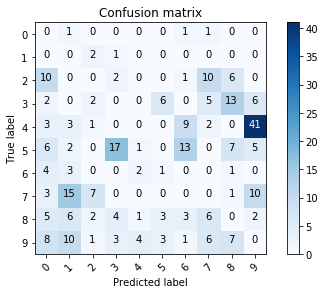

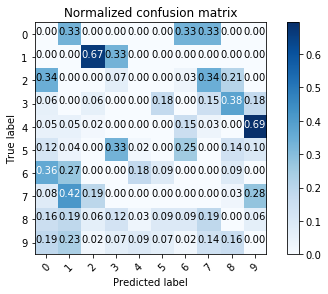

In [41]:
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_last_4)
for i in range(10):
    cnf_matrix[i, i] = 0
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.savefig('fig_last_conf_matrix.pdf')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()